In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits

# DES graveyard

In [3]:
fourlac = pd.read_excel('exported_dataFrames/4lacdes_w_voidiness_dup_drop_above_z0_1.xlsx')
DES_cat = pd.read_excel('processedDES_voids.xlsx')

In [123]:
fourlac

,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,DEdeg,GLON,GLAT,Signif_Avg,Flux1000,...,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy,TeVflag,81,cmvd_Mpc,Voidiness
0,2,2,4FGL J0001.4-0010,3,0.371700,-0.169900,96.891991,-60.491329,4.900018,1.082246e-10,...,3609939148800,2.473256e-13,9.272764,0.000000,10.000000,30.056200,NaN,80.0,1786.263959,0.438093
1,19,19,4FGL J0006.3-0620,1,1.599200,-6.349300,93.647018,-66.625183,5.253405,1.267563e-10,...,8317637754880,8.180352e-12,23.379368,0.485610,0.332412,-inf,NaN,NaN,1382.811853,0.347771
2,21,21,4FGL J0006.4-5621,3,1.610300,-56.363499,315.288605,-59.672195,4.604296,8.951057e-11,...,2077304291328,4.181393e-13,11.135396,0.000000,10.000000,-inf,NaN,NaN,1176.730618,0.329850
3,30,30,4FGL J0009.8-4317,1,2.453300,-43.297901,327.775055,-71.766167,12.907928,2.414374e-10,...,0,0.000000e+00,13.812000,0.191400,0.222694,27.382401,NaN,NaN,2112.791679,0.448482
4,55,55,4FGL J0017.5-0514,1,4.394900,-5.234700,101.209854,-66.667816,23.899353,7.145970e-10,...,8491804655616,2.607234e-12,277.968903,0.967473,0.213799,10.075500,NaN,NaN,931.847268,0.260828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,3313,3313,4FGL J2326.9-0201,1,351.735504,-2.023000,80.476326,-57.753719,8.464530,2.269354e-10,...,1258925378764800,5.593427e-12,17.579027,0.349868,0.193220,-inf,NaN,NaN,779.020414,0.130467
124,3321,3321,4FGL J2329.3-4955,1,352.329407,-49.932400,331.993195,-62.307026,177.390915,9.905996e-09,...,4897788395520,4.769502e-12,16384.978516,1.194268,0.254765,53.499802,NaN,NaN,1975.804241,0.537090
125,3335,3335,4FGL J2332.1-4118,1,353.025391,-41.301498,346.799622,-68.418884,7.397787,1.861615e-10,...,28183829151744,9.526404e-13,4.379859,0.000000,10.000000,30.956600,NaN,NaN,2459.114694,0.400144
126,3349,3349,4FGL J2338.1+0325,1,354.528809,3.426200,90.031120,-54.692966,6.132237,1.829369e-10,...,107151934619648,1.372474e-12,13.063762,0.055245,1.288974,-inf,NaN,NaN,1096.787425,0.338179


In [124]:
des_fsrq = fourlac[(fourlac['CLASS'] == 'b\'fsrq\'') | (fourlac['CLASS'] == 'b\'FSRQ\'')]
des_bll = fourlac[(fourlac['CLASS'] == 'b\'bll\'') | (fourlac['CLASS'] == 'b\'BLL\'')]
des_rdg = fourlac[(fourlac['CLASS'] == 'b\'rdg\'')]
des_nlsy1 = fourlac[(fourlac['CLASS'] == 'b\'NLSY1\'')]
des_bcu = fourlac[(fourlac['CLASS'] == 'b\'bcu\'')]

In [111]:
print("FSRQ:",len(des_fsrq))

print("BLAC:",len(des_bll))

print("NLSY1:",len(des_nlsy1))

print("RDG:",len(des_rdg))

print("BCU:",len(des_bcu))

FSRQ: 33
BLAC: 84
NLSY1: 0
RDG: 2
BCU: 9


In [131]:
des_bcu[des_bcu.z >= 0.4]

,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,DEdeg,GLON,GLAT,Signif_Avg,Flux1000,...,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy,TeVflag,81,cmvd_Mpc,Voidiness
35,295,295,4FGL J0151.4-3607,1,27.870399,-36.126999,251.861374,-74.399864,10.077243,1.946794e-10,...,158489326387200,7.571745e-13,10.797726,0.000000,10.000000,-inf,NaN,NaN,2489.225588,0.460585
127,3393,3393,4FGL J2358.0-4601,1,359.522308,-46.017601,328.670715,-68.353378,12.299651,2.368077e-10,...,5754399490048,1.061107e-12,30.538687,0.477398,0.157409,14.3653,NaN,NaN,1726.230188,0.492115


In [2]:
# Function to convert RA, DEC, redshift to 3D coordinates (x, y, z)

def get_3d_coordinates(ra, dec, redshift, distance):
    # Assuming the redshift corresponds to a comoving distance
    # For simplicity, assume a cosmology where distance in Mpc is proportional to redshift
    # Convert RA, DEC to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    
    # Spherical to Cartesian conversion
    if isinstance(ra, pd.core.series.Series):
        x = (distance * np.cos(dec_rad) * np.cos(ra_rad)).values #Mpc
        y = (distance * np.cos(dec_rad) * np.sin(ra_rad)).values #Mpc
        z = (distance * np.sin(dec_rad)).values #Mpc
  
        locs = []
        for i in range(len(x)):
            locs.append([x[i], y[i], z[i]])
    else:
        x = (distance * np.cos(dec_rad) * np.cos(ra_rad)) #Mpc
        y = (distance * np.cos(dec_rad) * np.sin(ra_rad)) #Mpc
        z = (distance * np.sin(dec_rad)) #Mpc
  
        locs = []
        for i in range(len(x)):
            locs.append([x[i], y[i], z[i]])
    return np.asarray(locs)

In [113]:
source_coords = get_3d_coordinates(fourlac['RAdeg'], fourlac['DEdeg'], fourlac['z'], fourlac['cmvd_Mpc'])
sphere_coords = get_3d_coordinates(DES_cat['RAdeg'], DES_cat['DEdeg'], DES_cat['z'], DES_cat['cmvd_Mpc'])

In [114]:

# Checking if point sources are inside any sphere
source_locs = []
void_locs = []
for j in range(len(source_coords)):
    for i in range(len(sphere_coords)):
        distance = np.linalg.norm(source_coords[j] - sphere_coords[i])
        
        if distance <= DES_cat.iloc[i]['Reff_Mpc']:
            source_locs.append(j)
            void_locs.append(i)

In [115]:
sources_in_voids = fourlac.iloc[source_locs]
voids_w_sources = DES_cat.iloc[void_locs]

In [116]:
len(sources_in_voids)

101

In [117]:
sources_in_voids_dupdrop = sources_in_voids.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
len(sources_in_voids_dupdrop)

77

In [118]:
print("FSRQ:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'fsrq\'') | (sources_in_voids_dupdrop.CLASS == 'b\'FSRQ\'')]))

print("BLAC:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'bll\'') | (sources_in_voids_dupdrop.CLASS == 'b\'BLL\'')]))

print("NLSY1:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'NSLY1\'')]))

print("RDG:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'rdg\'')]))

print("BCU:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'bcu\'')]))

FSRQ: 20
BLAC: 49
NLSY1: 0
RDG: 1
BCU: 7


Text(0.5, 1.0, 'DES')

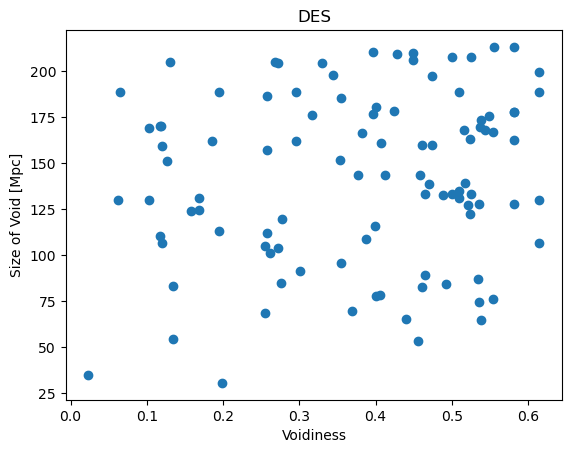

In [53]:
plt.scatter(sources_in_voids['Voidiness'], voids_w_sources['Reff_Mpc'])
plt.xlabel("Voidiness")
plt.ylabel("Size of Void [Mpc]")
plt.title("DES")

In [119]:
sources_in_voids_dupdrop.to_excel("exported_dataFrames/4lacdes_invoids.xlsx")
bll = sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'bll\'') | (sources_in_voids_dupdrop.CLASS == 'b\'BLL\'')]
bll.to_excel('exported_dataFrames/4lacdes_invoids_bll.xlsx')

In [120]:
bll

,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,DEdeg,GLON,GLAT,Signif_Avg,Flux1000,...,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy,TeVflag,81,cmvd_Mpc,Voidiness
2,21,21,4FGL J0006.4-5621,3,1.610300,-56.363499,315.288605,-59.672195,4.604296,8.951057e-11,...,2077304291328,4.181393e-13,11.135396,0.000000,10.000000,-inf,NaN,NaN,1176.730618,0.329850
3,30,30,4FGL J0009.8-4317,1,2.453300,-43.297901,327.775055,-71.766167,12.907928,2.414374e-10,...,0,0.000000e+00,13.812000,0.191400,0.222694,27.382401,NaN,NaN,2112.791679,0.448482
8,90,90,4FGL J0032.4-2849,1,8.107600,-28.822399,9.845286,-85.474831,6.869231,1.410717e-10,...,43651581345792,2.432439e-12,21.886372,0.606835,0.279848,-inf,NaN,NaN,1298.215247,0.554459
11,111,111,4FGL J0040.4-2340,1,10.101200,-23.670401,86.554779,-85.738342,7.724342,1.631235e-10,...,316227771695104,1.592788e-12,30.359228,0.697652,0.250185,12.998600,NaN,NaN,877.339363,0.254951
15,168,168,4FGL J0101.0-0059,1,15.262900,-0.990400,128.373764,-63.760525,7.039866,1.683155e-10,...,158489326387200,8.063359e-13,15.194450,0.262968,0.339522,-inf,NaN,NaN,2456.093932,0.516016
18,189,189,4FGL J0110.0-4019,1,17.515900,-40.317799,287.826813,-76.259338,10.095177,1.671849e-10,...,20183664084123648,1.596526e-12,18.052845,0.415642,0.228774,35.619598,NaN,NaN,1257.989445,0.465222
19,192,192,4FGL J0110.7-1254,1,17.693399,-12.907700,141.531570,-75.076767,10.370160,2.387038e-10,...,99999998430674944,1.937631e-12,12.389699,0.050993,1.214790,93.072403,NaN,NaN,958.952744,0.116808
22,206,206,4FGL J0114.9-3400,1,18.739799,-34.006302,268.032410,-81.463364,9.757480,1.190399e-10,...,331131106885632,3.587633e-13,16.105217,0.453666,0.324554,69.369301,NaN,NaN,1855.712455,0.614482
24,214,214,4FGL J0116.5-2812,1,19.134199,-28.201000,225.304443,-84.340752,5.832782,1.308997e-10,...,0,0.000000e+00,25.809965,0.727136,0.327291,-inf,NaN,NaN,2545.952755,0.555570
25,216,216,4FGL J0117.5-2442,1,19.390699,-24.714500,192.046005,-83.650520,3.298373,4.755141e-11,...,0,0.000000e+00,7.613724,0.000000,10.000000,71.517899,NaN,NaN,1130.836566,0.103194


In [5]:
des_qsos = pd.read_excel('exported_dataFrames/qsosdes_w_voidiness_dup_drop_above_z0_1.xlsx')

,Unnamed: 0,COADD_OBJECT_ID,RAdeg,DEdeg,EXTENDED_COADD,SN_MAX_PSF,SN3,PHOTOMETRY,BAND_DES,MAG_PSF_G,...,PHOTOZ_GALAXY,Z1_GALAXY,Z2_GALAXY,P_GALAXY_Z,P_STAR,z,Z_SPEC_CAT,CLASS_SPEC,cmvd_Mpc,Voidiness
0,583,1422235103,58.949513,-66.759392,2,821.615173,10,b'PSF ',b'grizy',18.630949,...,0.26,0.24,0.28,0.915183,2.571547e-10,0.775000,b'Milliquas',b'QSO ',2763.812387,0.322908
1,2727,1247911214,31.937942,-65.718042,0,1737.279297,10,b'PSF ',b'grizy',17.734570,...,0.21,0.20,0.23,0.692353,5.193598e-11,0.663000,b'Milliquas',b'QSO ',2434.898647,0.439575
2,21707,979549844,341.985873,-64.455101,0,590.718323,9,b'PSF ',b'grizy',19.256910,...,0.24,0.21,0.32,0.780113,2.017598e-06,0.598000,b'Milliquas',b'QSO ',2233.886405,0.260027
3,30697,929026946,324.210493,-64.017843,0,2513.587891,10,b'PSF ',b'grizy',17.119080,...,0.03,0.01,0.05,0.955491,8.113946e-10,0.401000,b'Milliquas',b'QSO ',1576.297701,0.299192
4,31630,1041057374,1.920881,-63.862749,0,2649.978027,10,b'PSF ',b'grizy',16.493906,...,0.09,0.04,0.15,0.875881,8.762134e-08,0.558000,b'Milliquas',b'QSO ',2106.343910,0.327012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8263,1352770,1314144116,39.351000,5.138683,0,71.127525,11,b'PSF ',b'grizy',21.305475,...,0.20,0.19,0.22,0.407245,1.408481e-04,0.617000,b'SDSS ',b'QSO ',2293.435561,0.113042
8264,1352775,1314144325,39.539631,5.133964,0,124.390724,10,b'PSF ',b'grizy',20.642847,...,0.29,0.25,0.37,0.850579,4.063497e-04,0.767503,b'SDSS ',b'QSO ',2742.462696,0.100048
8265,1352924,1344206064,43.604435,5.146093,0,126.529366,11,b'PSF ',b'grizy',20.490564,...,0.27,0.24,0.33,0.630444,1.443746e-04,0.631000,b'Milliquas',b'QSO ',2336.892978,0.173355
8266,1352930,1349991921,43.788917,5.271236,0,1295.513306,11,b'PSF ',b'grizy',17.434549,...,0.11,0.04,0.15,0.961366,1.870344e-10,0.686000,b'Milliquas',b'QSO ',2504.215038,0.170243


In [7]:
source_coords = get_3d_coordinates(des_qsos['RAdeg'], des_qsos['DEdeg'], des_qsos['z'], des_qsos['cmvd_Mpc'])
sphere_coords = get_3d_coordinates(DES_cat['RAdeg'], DES_cat['DEdeg'], DES_cat['z'], DES_cat['cmvd_Mpc'])

In [9]:

# Checking if point sources are inside any sphere
source_locs = []
void_locs = []
for j in range(len(source_coords)):
    for i in range(len(sphere_coords)):
        distance = np.linalg.norm(source_coords[j] - sphere_coords[i])
        
        if distance <= DES_cat.iloc[i]['Reff_Mpc']:
            source_locs.append(j)
            void_locs.append(i)

In [10]:
sources_in_voids = des_qsos.iloc[source_locs]
voids_w_sources = DES_cat.iloc[void_locs]

In [11]:
sources_in_voids_dupdrop = sources_in_voids.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')

In [12]:
len(sources_in_voids_dupdrop)

4074

In [13]:
sources_in_voids_dupdrop.to_excel("exported_dataFrames/qsosdes_invoids.xlsx")

## both Bl Lac and QSOS in voids

### 0.1 - 0.4 (28 sources)

KS: 0.1149

median P-value: 0.8628316837408929

Significance (one-tail): -1.0931302125151416 Sigma

### 0.4 - 0.8 (21 sources)
 
KS: 0.2092

median P-value: 0.2868579535705024

Significance (one-tail): 0.5625873511668265 Sigma

## BL lac in voids, QSOS not necessarily in voids

### 0.1 - 0.4

KS: 0.1538

median P-value: 0.5142975608000159

Significance (one-tail): -0.035846345536410855 Sigma

### 0.4 - 0.8

KS: 0.31

median P-value: 0.028680809501846125

Significance (one-tail): 1.9005451251839551 Sigma

In [15]:
bllac_invoids = pd.read_excel('exported_dataFrames/4lacdes_invoids_bll.xlsx')

In [17]:
bllac_invoids[bllac_invoids.z >= 0.4]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,DEdeg,GLON,GLAT,Signif_Avg,...,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy,TeVflag,81,cmvd_Mpc,Voidiness
1,3,30,30,4FGL J0009.8-4317,1,2.453300,-43.297901,327.775055,-71.766167,12.907928,...,0,0.000000e+00,13.812000,0.191400,0.222694,27.382401,NaN,NaN,2112.791679,0.448482
4,15,168,168,4FGL J0101.0-0059,1,15.262900,-0.990400,128.373764,-63.760525,7.039866,...,158489326387200,8.063359e-13,15.194450,0.262968,0.339522,-inf,NaN,NaN,2456.093932,0.516016
7,22,206,206,4FGL J0114.9-3400,1,18.739799,-34.006302,268.032410,-81.463364,9.757480,...,331131106885632,3.587633e-13,16.105217,0.453666,0.324554,69.369301,NaN,NaN,1855.712455,0.614482
8,24,214,214,4FGL J0116.5-2812,1,19.134199,-28.201000,225.304443,-84.340752,5.832782,...,0,0.000000e+00,25.809965,0.727136,0.327291,-inf,NaN,NaN,2545.952755,0.555570
12,30,271,271,4FGL J0140.6-0758,1,25.162600,-7.974500,156.522095,-67.578003,6.936273,...,33496544430784512,1.249071e-12,17.629707,0.552885,0.321825,29.544201,NaN,NaN,1882.614903,0.524170
13,31,273,273,4FGL J0141.4-0928,1,25.362600,-9.482500,159.065887,-68.769402,71.798050,...,17378008104960,3.962534e-12,536.559265,0.586691,0.127483,145.093994,NaN,NaN,2645.902261,0.538131
17,40,333,333,4FGL J0204.0-3334,1,31.023800,-33.573101,239.727707,-73.083076,7.732053,...,0,0.000000e+00,14.709603,0.244827,0.510348,21.969400,NaN,NaN,2293.435511,0.398907
20,47,391,391,4FGL J0220.8-0841,1,35.208801,-8.693200,176.017395,-61.957279,7.129647,...,1412537568460800,1.000624e-12,14.462022,0.000000,10.000000,-inf,NaN,NaN,1677.814984,0.517320
22,53,439,439,4FGL J0235.6-2939,1,38.900799,-29.651699,225.385498,-67.000542,7.796534,...,6309573245796352,6.112037e-13,16.109734,0.077584,0.888640,132.145004,NaN,NaN,2425.788488,0.258054
23,56,443,443,4FGL J0237.6-3602,1,39.424400,-36.042198,241.129807,-65.776169,12.706760,...,10715192857985020,2.958789e-12,28.768246,0.600472,0.203856,132.848999,NaN,NaN,1611.491505,0.424539


# 4LAC in voids

In [2]:
#fourlac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
sutter = pd.read_excel('processedsutter_voids.xlsx')

In [3]:
fourlac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')

In [118]:
# Function to convert RA, DEC, redshift to 3D coordinates (x, y, z)

def get_3d_coordinates(ra, dec, redshift, distance):
    # Assuming the redshift corresponds to a comoving distance
    # For simplicity, assume a cosmology where distance in Mpc is proportional to redshift
    # Convert RA, DEC to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    
    # Spherical to Cartesian conversion
    x = (distance * np.cos(dec_rad) * np.cos(ra_rad)).values #Mpc
    y = (distance * np.cos(dec_rad) * np.sin(ra_rad)).values #Mpc
    z = (distance * np.sin(dec_rad)).values #Mpc
  
    locs = []
    for i in range(len(x)):
        locs.append([x[i], y[i], z[i]])
    
    return np.asarray(locs)

In [119]:
#getting 3D coordinates for the 4LAC sources and voids
source_coords = get_3d_coordinates(fourlac['RAdeg'], fourlac['DEdeg'], fourlac['z'], fourlac['cmvd_Mpc']) #location of 4lac
sphere_coords = get_3d_coordinates(sutter['RAdeg'], sutter['DEdeg'], sutter['z'], sutter['cmvd_Mpc']) #locations of void center



In [315]:

# Checking if point sources are inside any sphere
source_locs = []
void_locs = []
void_rad = []
for j in range(len(source_coords)): #for every 4lac source
    for i in range(len(sphere_coords)): #checking if its within any void
        distance = np.linalg.norm(source_coords[j] - sphere_coords[i]) 
        
        if distance <= sutter.iloc[i]['Reff_Mpc']: #within void if distance between sources is less than radius of void
            source_locs.append(j)
            void_locs.append(i)
            void_rad.append(i)

In [317]:
len(source_locs)

4891

In [167]:
sources_in_voids = fourlac.iloc[source_locs]
voids_w_sources = sutter.iloc[void_locs]

In [168]:
len(sources_in_voids)

104

In [170]:
sources_in_voids_dupdrop = sources_in_voids.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')

In [171]:
len(sources_in_voids_dupdrop)

84

In [140]:
voids_w_sources

,Unnamed: 0,ID,RAdeg,DEdeg,z,Reff,Core Density,cmvd_Mpc,Reff_Mpc,r_ang_deg
3433,3433,20688,121.78,29.80,0.50801,64.09,1.354894,1942.727967,91.951220,2.709843
2630,2630,8063,125.71,28.50,0.22825,30.31,0.823790,936.694802,43.486370,2.658067
2763,2763,10868,128.82,9.51,0.36186,60.25,0.968318,1436.637312,86.441894,3.443313
1978,1978,36812,127.08,16.12,0.16882,28.99,0.056605,702.737703,41.592539,3.387181
2117,2117,17262,135.72,5.98,0.27780,63.59,0.007863,1126.306092,91.233859,4.631003
...,...,...,...,...,...,...,...,...,...,...
1546,1546,11208,247.64,32.45,0.40151,62.58,0.356363,1578.097401,89.784792,3.256294
2877,2877,69266,250.51,41.88,0.35222,52.14,1.297809,1401.770012,74.806313,3.054727
5131,5131,58142,249.72,33.54,0.60502,43.44,1.310918,2255.965216,62.324247,1.582475
3278,3278,2288,252.58,25.32,0.13144,28.40,2.904053,551.953998,40.746055,4.222000


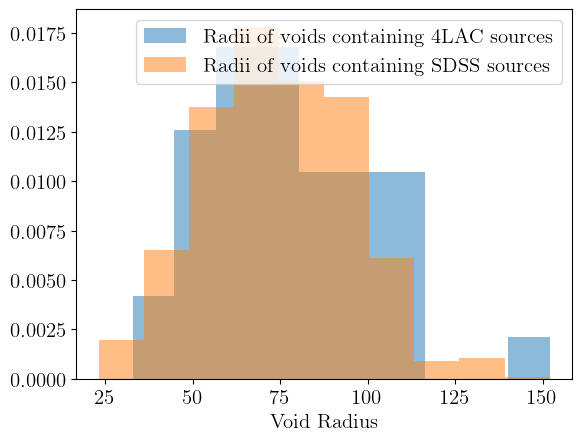

In [201]:
#plt.figure(figsize = (8,8))

#plt.hist(sutter.Reff_Mpc, density = True, alpha = 0.8, label = 'Total void radii')
plt.hist(voids_w_sources[voids_w_sources.z >= 0.4].Reff_Mpc, density = True, alpha = 0.5, label = 'Radii of voids containing 4LAC sources')
plt.hist(sdss_voids_w_sources[sdss_voids_w_sources.z >= 0.4].Reff_Mpc, density = True, alpha = 0.5, label = 'Radii of voids containing SDSS sources')
plt.xlabel('Void Radius')
plt.legend()

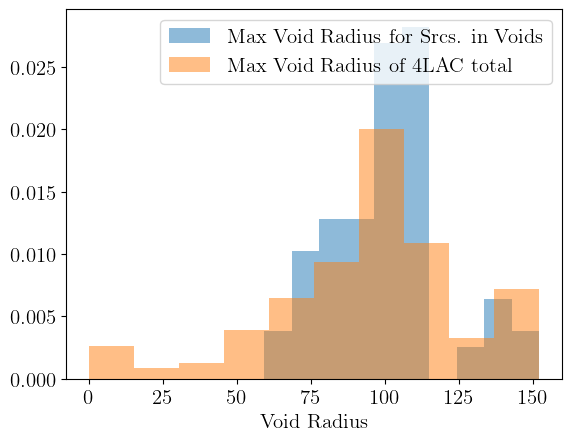

In [176]:
plt.hist(sources_in_voids_dupdrop['Max Void Size'], alpha = 0.5, density = True, label = "Max Void Radius for Srcs. in Voids")
plt.hist(fourlac['Max Void Size'], alpha = 0.5, density = True, label = 'Max Void Radius of 4LAC total')
plt.xlabel('Void Radius')
plt.legend()

In [24]:
#determining class breakdown of sources in voids

print("FSRQ:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'fsrq\'') | (sources_in_voids_dupdrop.CLASS == 'b\'FSRQ\'')]))

print("BLAC:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'bll\'') | (sources_in_voids_dupdrop.CLASS == 'b\'BLL\'')]))

print("NLSY1:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'NLSY1\'')]))

print("RDG:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'rdg\'')]))

print("BCU:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'bcu\'')]))

print("CSS:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'css\'')]))

print("SSRQ:",len(sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'ssrq\'')]))

FSRQ: 9
BLAC: 67
NLSY1: 1
RDG: 0
BCU: 7
CSS: 0
SSRQ: 0


In [26]:
sources_in_voids_dupdrop.to_excel("exported_dataFrames/4lacsutter_invoids.xlsx")
bll = sources_in_voids_dupdrop[(sources_in_voids_dupdrop.CLASS == 'b\'bll\'') | (sources_in_voids_dupdrop.CLASS == 'b\'BLL\'')]
bll.to_excel('exported_dataFrames/4lacsutter_invoids_bll.xlsx')

## SDSS DES

In [38]:
from astropy.io import fits

In [121]:
sdss = pd.read_excel('exported_dataFrames/sdssdes_w_voidiness_dup_drop_above_z0_1.xlsx')
sdss

,SDSS_NAME,RAdeg,DEdeg,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,...,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,SN_MEDIAN_ALL,cmvd_Mpc,Voidiness
0,b'000006.01-035334.1',0.025065,-3.892811,7034,56564,636,QSO,b'QSO',1,0.677321,...,4000,0,-86.215248,186.664566,b'boss35',15665,12.613300,3.248213,2471.180214,0.477176
1,b'000010.75-054320.0',0.044805,-5.722223,7034,56564,328,QSO,b'QSO',1,0.747267,...,4000,175,-81.717667,-211.718063,b'boss35',15665,12.613300,2.417101,2700.895456,0.418351
2,b'000010.97+005653.3',0.045749,0.948154,7848,56959,955,QSO,b'QSO',1,0.651190,...,5400,0,183.082214,152.346573,b'eboss2',16325,47.148399,5.472514,2405.696690,0.397217
3,b'000011.96+000225.2',0.049839,0.040351,9403,58018,485,QSO,b'QSO',1,0.482406,...,5400,0,-190.595673,-103.505791,b'eboss22',17186,15.905000,28.213453,1847.465899,0.448737
4,b'000016.43-001833.4',0.068485,-0.309283,9403,58018,440,QSO,b'QSO',1,0.702544,...,5400,0,-186.600555,-179.711716,b'eboss22',17186,15.905000,23.871439,2553.042153,0.398444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,b'235943.84+012450.7',359.932675,1.414107,7848,56959,906,QSO,b'QSO',1,0.777386,...,5400,0,158.559769,254.038864,b'eboss2',16325,47.148399,3.191701,2773.166792,0.459969
7242,b'235945.20-005057.5',359.938341,-0.849322,9159,57666,15,QSO,b'QSO',1,0.579526,...,5400,0,267.265198,-8.062367,b'eboss20',17020,14.855100,24.395992,2176.859592,0.479671
7243,b'235948.50-022405.6',359.952119,-2.401576,7850,56956,376,QSO,b'QSO',1,0.685928,...,5400,0,-89.916649,-178.565475,b'eboss2',16327,19.623699,9.416295,2514.514329,0.527353
7244,b'235953.90-030559.1',359.974602,-3.099757,7895,57659,878,QSO,b'QSO',1,0.513228,...,5400,0,128.370636,176.725296,b'eboss2',16328,15.055000,2.609642,1956.729625,0.572958


In [96]:
sdss = sdss[sdss['AUTOCLASS_PQN'] == 'QSO']
sdss

,SDSS_NAME,RAdeg,DEdeg,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,...,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,SN_MEDIAN_ALL,cmvd_Mpc,Voidiness
0,b'000006.01-035334.1',0.025065,-3.892811,7034,56564,636,QSO,b'QSO',1,0.677321,...,4000,0,-86.215248,186.664566,b'boss35',15665,12.613300,3.248213,2471.180214,0.477176
1,b'000010.75-054320.0',0.044805,-5.722223,7034,56564,328,QSO,b'QSO',1,0.747267,...,4000,175,-81.717667,-211.718063,b'boss35',15665,12.613300,2.417101,2700.895456,0.418351
2,b'000010.97+005653.3',0.045749,0.948154,7848,56959,955,QSO,b'QSO',1,0.651190,...,5400,0,183.082214,152.346573,b'eboss2',16325,47.148399,5.472514,2405.696690,0.397217
3,b'000011.96+000225.2',0.049839,0.040351,9403,58018,485,QSO,b'QSO',1,0.482406,...,5400,0,-190.595673,-103.505791,b'eboss22',17186,15.905000,28.213453,1847.465899,0.448737
4,b'000016.43-001833.4',0.068485,-0.309283,9403,58018,440,QSO,b'QSO',1,0.702544,...,5400,0,-186.600555,-179.711716,b'eboss22',17186,15.905000,23.871439,2553.042153,0.398444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,b'235943.84+012450.7',359.932675,1.414107,7848,56959,906,QSO,b'QSO',1,0.777386,...,5400,0,158.559769,254.038864,b'eboss2',16325,47.148399,3.191701,2773.166792,0.459969
7242,b'235945.20-005057.5',359.938341,-0.849322,9159,57666,15,QSO,b'QSO',1,0.579526,...,5400,0,267.265198,-8.062367,b'eboss20',17020,14.855100,24.395992,2176.859592,0.479671
7243,b'235948.50-022405.6',359.952119,-2.401576,7850,56956,376,QSO,b'QSO',1,0.685928,...,5400,0,-89.916649,-178.565475,b'eboss2',16327,19.623699,9.416295,2514.514329,0.527353
7244,b'235953.90-030559.1',359.974602,-3.099757,7895,57659,878,QSO,b'QSO',1,0.513228,...,5400,0,128.370636,176.725296,b'eboss2',16328,15.055000,2.609642,1956.729625,0.572958


In [97]:
# Function to convert RA, DEC, redshift to 3D coordinates (x, y, z)

def get_3d_coordinates(ra, dec, redshift, distance):
    # Assuming the redshift corresponds to a comoving distance
    # For simplicity, assume a cosmology where distance in Mpc is proportional to redshift
    # Convert RA, DEC to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    
    # Spherical to Cartesian conversion
    x = (distance * np.cos(dec_rad) * np.cos(ra_rad)).values #Mpc
    y = (distance * np.cos(dec_rad) * np.sin(ra_rad)).values #Mpc
    z = (distance * np.sin(dec_rad)).values #Mpc
  
    locs = []
    for i in range(len(x)):
        locs.append([x[i], y[i], z[i]])
    
    return np.asarray(locs)

In [98]:
source_coords = get_3d_coordinates(sdss['RAdeg'], sdss['DEdeg'], sdss['z'], sdss['cmvd_Mpc'])
sphere_coords = get_3d_coordinates(DES_cat['RAdeg'], DES_cat['DEdeg'], DES_cat['z'], DES_cat['cmvd_Mpc'])

In [99]:
source_locs = []
void_locs = []
for j in range(len(source_coords)):
    for i in range(len(sphere_coords)):
        distance = np.linalg.norm(source_coords[j] - sphere_coords[i])
        
        if distance <= DES_cat.iloc[i]['Reff_Mpc']:
            source_locs.append(j)
            void_locs.append(i)

In [100]:
sources_in_voids = sdss.iloc[source_locs]
voids_w_sources = DES_cat.iloc[void_locs]

In [101]:
sources_in_voids_dupdrop = sources_in_voids.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')

In [102]:
len(sources_in_voids)

4115

In [103]:
len(sources_in_voids_dupdrop)

3176

In [104]:
sources_in_voids_dupdrop

,SDSS_NAME,RAdeg,DEdeg,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,...,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,SN_MEDIAN_ALL,cmvd_Mpc,Voidiness
0,b'000006.01-035334.1',0.025065,-3.892811,7034,56564,636,QSO,b'QSO',1,0.677321,...,4000,0,-86.215248,186.664566,b'boss35',15665,12.613300,3.248213,2471.180214,0.477176
1,b'000010.75-054320.0',0.044805,-5.722223,7034,56564,328,QSO,b'QSO',1,0.747267,...,4000,175,-81.717667,-211.718063,b'boss35',15665,12.613300,2.417101,2700.895456,0.418351
3,b'000011.96+000225.2',0.049839,0.040351,9403,58018,485,QSO,b'QSO',1,0.482406,...,5400,0,-190.595673,-103.505791,b'eboss22',17186,15.905000,28.213453,1847.465899,0.448737
7,b'000020.94-035228.7',0.087257,-3.874659,7895,57659,898,QSO,b'QSO',1,0.445211,...,5400,0,152.665146,7.944814,b'eboss2',16328,15.055000,18.323530,1728.208212,0.533288
8,b'000021.11-023536.1',0.087968,-2.593372,4354,55810,354,QSO,b'QSO',1,0.456597,...,4000,0,-19.307280,-68.159988,b'boss13',10993,10.272900,7.688524,1760.577271,0.541724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,b'235926.25-004750.4',359.859399,-0.797346,9159,57666,14,QSO,b'QSO',1,0.396646,...,5400,0,250.032745,3.268068,b'eboss20',17020,14.855100,11.794616,1560.440432,0.495954
7237,b'235930.64+011958.5',359.877695,1.332937,9179,57682,19,QSO,b'QSO',1,0.527260,...,5400,0,108.567596,-49.939007,b'eboss20',17040,21.005400,21.321688,1988.652229,0.449020
7240,b'235940.64+010008.7',359.919357,1.002440,9179,57682,9,QSO,b'QSO',1,0.220378,...,5400,0,117.705238,-121.914413,b'eboss20',17040,21.005400,4.351089,906.780627,0.314021
7241,b'235943.84+012450.7',359.932675,1.414107,7848,56959,906,QSO,b'QSO',1,0.777386,...,5400,0,158.559769,254.038864,b'eboss2',16325,47.148399,3.191701,2773.166792,0.459969


In [105]:
sources_in_voids_dupdrop.to_excel('exported_dataFrames/sdssdes_invoids.xlsx')

# SDSS in voids

In [141]:
sdss = pd.read_excel('exported_dataFrames/sdsssutter_w_voidiness_dup_drop_above_z0_1.xlsx')
sdss

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,SDSS_NAME,RAdeg,DEdeg,PLATE,MJD,FIBERID,AUTOCLASS_PQN,...,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,SN_MEDIAN_ALL,cmvd_Mpc,Voidiness,Void_Dist_Mpc
0,4,4,4,b'074318.11+240953.0',115.825470,24.164732,11103,58488,626,QSO,...,0,-110.751442,259.947815,b'eboss27',17635,15.0227,1.646996,1984.177536,0.152967,303.512764
1,5,5,5,b'074331.20+225539.2',115.880016,22.927580,4470,55587,142,QSO,...,0,84.645218,-132.694763,b'boss14',11074,12.7829,4.834815,2440.963321,0.245845,600.099209
2,13,13,13,b'074417.38+221410.7',116.072456,22.236319,11103,58488,317,QSO,...,0,-62.475685,-160.307037,b'eboss27',17635,15.0227,2.029319,2382.724916,0.287163,684.231258
3,15,15,15,b'074423.46+260803.3',116.097754,26.134267,4462,55600,808,QSO,...,0,54.671295,42.906563,b'boss14',11075,10.4521,4.288174,1767.423239,0.112523,198.875869
4,16,16,16,b'074433.22+263334.7',116.138427,26.559655,11095,58439,972,QSO,...,0,268.954254,38.991104,b'eboss27',17622,13.0277,2.179825,2268.274806,0.137897,312.788057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19746,75910,75910,75910,b'172102.59+314002.3',260.260800,31.667327,11654,58543,962,QSO,...,0,186.453033,113.245499,b'eboss3',16386,10.4121,2.647143,2202.123202,0.134321,295.792032
19747,75913,75913,75913,b'172118.94+303000.1',260.328944,30.500048,11654,58543,62,QSO,...,0,201.582977,-140.892670,b'eboss3',16386,10.4121,2.672547,1405.684184,0.087449,122.925515
19748,75914,75914,75914,b'172122.68+313010.2',260.344532,31.502840,4998,55722,144,QSO,...,0,117.811249,-140.879547,b'boss18',13531,10.9455,3.782367,2416.662120,0.122275,295.496749
19749,75917,75917,75917,b'172217.26+301710.0',260.571918,30.286116,11654,58543,47,QSO,...,0,247.979126,-187.193176,b'eboss3',16386,10.4121,3.184899,2474.060624,0.039522,97.779941


In [142]:
sdss = sdss[sdss['AUTOCLASS_PQN'] == 'QSO']
sdss = sdss.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
sdss

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,SDSS_NAME,RAdeg,DEdeg,PLATE,MJD,FIBERID,AUTOCLASS_PQN,...,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,SN_MEDIAN_ALL,cmvd_Mpc,Voidiness,Void_Dist_Mpc
0,4,4,4,b'074318.11+240953.0',115.825470,24.164732,11103,58488,626,QSO,...,0,-110.751442,259.947815,b'eboss27',17635,15.0227,1.646996,1984.177536,0.152967,303.512764
1,5,5,5,b'074331.20+225539.2',115.880016,22.927580,4470,55587,142,QSO,...,0,84.645218,-132.694763,b'boss14',11074,12.7829,4.834815,2440.963321,0.245845,600.099209
2,13,13,13,b'074417.38+221410.7',116.072456,22.236319,11103,58488,317,QSO,...,0,-62.475685,-160.307037,b'eboss27',17635,15.0227,2.029319,2382.724916,0.287163,684.231258
3,15,15,15,b'074423.46+260803.3',116.097754,26.134267,4462,55600,808,QSO,...,0,54.671295,42.906563,b'boss14',11075,10.4521,4.288174,1767.423239,0.112523,198.875869
4,16,16,16,b'074433.22+263334.7',116.138427,26.559655,11095,58439,972,QSO,...,0,268.954254,38.991104,b'eboss27',17622,13.0277,2.179825,2268.274806,0.137897,312.788057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19746,75910,75910,75910,b'172102.59+314002.3',260.260800,31.667327,11654,58543,962,QSO,...,0,186.453033,113.245499,b'eboss3',16386,10.4121,2.647143,2202.123202,0.134321,295.792032
19747,75913,75913,75913,b'172118.94+303000.1',260.328944,30.500048,11654,58543,62,QSO,...,0,201.582977,-140.892670,b'eboss3',16386,10.4121,2.672547,1405.684184,0.087449,122.925515
19748,75914,75914,75914,b'172122.68+313010.2',260.344532,31.502840,4998,55722,144,QSO,...,0,117.811249,-140.879547,b'boss18',13531,10.9455,3.782367,2416.662120,0.122275,295.496749
19749,75917,75917,75917,b'172217.26+301710.0',260.571918,30.286116,11654,58543,47,QSO,...,0,247.979126,-187.193176,b'eboss3',16386,10.4121,3.184899,2474.060624,0.039522,97.779941


In [143]:
# Function to convert RA, DEC, redshift to 3D coordinates (x, y, z)

def get_3d_coordinates(ra, dec, redshift, distance):
    # Assuming the redshift corresponds to a comoving distance
    # For simplicity, assume a cosmology where distance in Mpc is proportional to redshift
    # Convert RA, DEC to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    
    # Spherical to Cartesian conversion
    x = (distance * np.cos(dec_rad) * np.cos(ra_rad)).values #Mpc
    y = (distance * np.cos(dec_rad) * np.sin(ra_rad)).values #Mpc
    z = (distance * np.sin(dec_rad)).values #Mpc
  
    locs = []
    for i in range(len(x)):
        locs.append([x[i], y[i], z[i]])
    
    return np.asarray(locs)

In [144]:
source_coords = get_3d_coordinates(sdss['RAdeg'], sdss['DEdeg'], sdss['z'], sdss['cmvd_Mpc'])
sphere_coords = get_3d_coordinates(sutter['RAdeg'], sutter['DEdeg'], sutter['z'], sutter['cmvd_Mpc'])

In [145]:
sdss_source_locs = []
sdss_void_locs = []
for j in range(len(source_coords)):
    for i in range(len(sphere_coords)):
        distance = np.linalg.norm(source_coords[j] - sphere_coords[i])
        
        if distance <= sutter.iloc[i]['Reff_Mpc']:
            sdss_source_locs.append(j)
            sdss_void_locs.append(i)

In [146]:
sdss_sources_in_voids = sdss.iloc[sdss_source_locs]
sdss_voids_w_sources = sutter.iloc[sdss_void_locs]

In [148]:
len(sdss_sources_in_voids)

4891

In [149]:
sdss_sources_in_voids_dupdrop = sdss_sources_in_voids.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')

In [150]:
len(sdss_sources_in_voids_dupdrop)

3768

In [52]:
sources_in_voids_dupdrop.to_excel('exported_dataFrames/sdsssutter_invoids.xlsx')

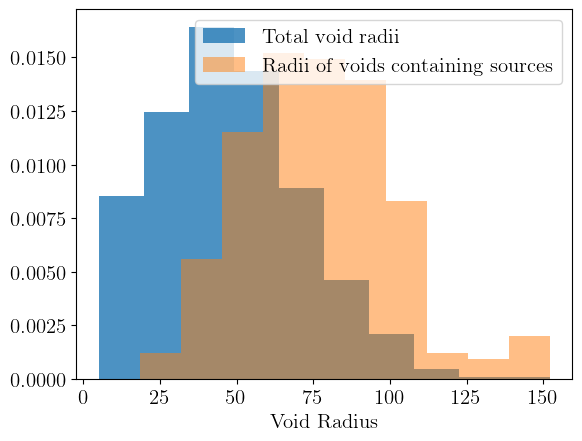

In [151]:
plt.hist(sutter.Reff_Mpc, density = True, alpha = 0.8, label = 'Total void radii')
plt.hist(sdss_voids_w_sources.Reff_Mpc, density = True, alpha = 0.5, label = 'Radii of voids containing sources')
plt.xlabel('Void Radius')
plt.legend()

In [53]:
sources_in_voids_dupdrop

,Unnamed: 0,SDSS_NAME,RAdeg,DEdeg,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,...,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,SN_MEDIAN_ALL,cmvd_Mpc,Voidiness,Void_Dist_Mpc
4,4,b'074318.11+240953.0',115.825470,24.164732,11103,58488,626,QSO,b'QSO',1,...,0,-110.751442,259.947815,b'eboss27',17635,15.02270,1.646996,1984.177536,0.152967,303.512764
15,15,b'074423.46+260803.3',116.097754,26.134267,4462,55600,808,QSO,b'QSO',1,...,0,54.671295,42.906563,b'boss14',11075,10.45210,4.288174,1767.423239,0.112523,198.875869
16,16,b'074433.22+263334.7',116.138427,26.559655,11095,58439,972,QSO,b'QSO',1,...,0,268.954254,38.991104,b'eboss27',17622,13.02770,2.179825,2268.274806,0.137897,312.788057
18,18,b'074455.19+202747.4',116.229989,20.463190,11082,58508,280,QSO,b'QSO',1,...,0,27.730366,-2.878066,b'eboss27',17599,9.82116,4.685452,2358.143080,0.265001,624.910476
20,20,b'074502.44+260535.7',116.260181,26.093261,4462,55600,858,QSO,b'QSO',1,...,0,86.432755,34.086105,b'boss14',11075,10.45210,7.064243,2274.701867,0.230265,523.784167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75844,75844,b'171714.28+345700.7',259.309533,34.950215,10724,58391,200,QSO,b'QSO',1,...,0,46.050373,-74.235008,b'eboss3',16385,12.81530,3.672686,2076.545491,0.276813,574.814962
75855,75855,b'171746.62+274043.4',259.444271,27.678738,5003,55715,658,QSO,b'QSO',1,...,0,-120.008018,-10.569472,b'boss18',13536,10.46210,3.838324,2057.745605,0.190726,392.465123
75863,75863,b'171817.25+314603.9',259.571903,31.767769,11654,58543,800,QSO,b'QSO',1,...,0,58.666901,134.275040,b'eboss3',16386,10.41210,4.894783,2292.717993,0.201877,462.847995
75901,75901,b'171945.98+261302.7',259.941598,26.217424,5016,55709,712,QSO,b'QSO',1,...,0,-71.641563,142.209427,b'boss18',13549,11.72670,3.654042,1946.014309,0.109879,213.826047


In [29]:
fourlac_invoids = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
fourlac_invoids

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,...,FluxInc25,FluxInc50,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45
0,5,5,5,5,8,1172,1172,4FGL J0812.6+2821,1,123.156197,...,7.681605e-13,3.849806e-13,3.209426e-13,2.751705e-13,2.408246e-13,2.141012e-13,2.028467e-13,6.406332e-13,4.809439e-13,4.276449e-13
1,9,9,9,9,13,1191,1191,4FGL J0818.4+2816,1,124.607597,...,1.662551e-12,8.341326e-13,6.955089e-13,5.963947e-13,5.220057e-13,4.641160e-13,4.397331e-13,1.387043e-12,1.041771e-12,9.264602e-13
2,22,22,22,22,27,1237,1237,4FGL J0835.7+0936,1,128.947403,...,1.671815e-12,8.398423e-13,7.004182e-13,6.006953e-13,5.258297e-13,4.675573e-13,4.430101e-13,1.395358e-12,1.048569e-12,9.326703e-13
3,23,23,23,23,28,1238,1238,4FGL J0835.8+1517,3,128.961304,...,4.598157e-12,2.341355e-12,1.957127e-12,1.681230e-12,1.473508e-12,1.311471e-12,1.243120e-12,3.855000e-12,2.913301e-12,2.596201e-12
4,36,36,36,36,41,1286,1286,4FGL J0857.7+0137,2,134.427902,...,5.529636e-12,2.823287e-12,2.361061e-12,2.028893e-12,1.778660e-12,1.583375e-12,1.500977e-12,4.640061e-12,3.510549e-12,3.129632e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,292,292,292,292,316,2507,2507,4FGL J1635.6+3500,1,248.900696,...,7.817444e-13,3.917610e-13,3.265913e-13,2.800112e-13,2.450596e-13,2.178652e-13,2.064123e-13,6.519467e-13,4.894230e-13,4.351801e-13
80,293,293,293,293,317,2513,2513,4FGL J1637.2+4327,2,249.324905,...,2.165337e-12,1.095283e-12,9.145115e-13,7.849579e-13,6.875558e-13,6.116577e-13,5.796637e-13,1.811402e-12,1.365127e-12,1.215407e-12
81,297,297,297,297,321,2531,2531,4FGL J1643.7+3317,1,250.943298,...,1.944913e-13,9.748026e-14,8.126622e-14,6.967678e-14,6.098033e-14,5.421383e-14,5.136409e-14,1.622062e-13,1.217769e-13,1.082824e-13
82,299,299,299,299,323,2542,2542,4FGL J1647.5+2911,1,251.883499,...,7.773918e-12,3.968569e-12,3.318754e-12,2.851800e-12,2.500040e-12,2.225528e-12,2.109703e-12,6.522978e-12,4.934809e-12,4.399258e-12


In [30]:
#creating dataframe with both fsrq sources and bl lac sources
fourlac_fsrq = fourlac_invoids[(fourlac_invoids.CLASS == 'b\'fsrq\'') | (fourlac_invoids.CLASS == 'b\'FSRQ\'')]
fourlac_bll = fourlac_invoids[(fourlac_invoids.CLASS == 'b\'bll\'') | (fourlac_invoids.CLASS == 'b\'BLL\'')]

In [31]:
fourlac_fsrq_bll = pd.concat([fourlac_fsrq, fourlac_bll])

In [32]:
fourlac_fsrq_bll.to_excel('exported_dataFrames/4lacsutter_invoids_bllfsrq.xlsx')


## KS test with sdss sources in voids (84 4lac sources)

### low redshift (54)

KS: 0.1388

median P-value: 0.3217682000424715

Significance (one-tail): 0.4627600077783096 Sigma

### high redshift (30)

KS: 0.1997

median P-value: 0.16938931238802624

Significance (one-tail): 0.9565813125932005 Sigma

## KS test with total sdss sources and 4lac sources in voids (84 sources)


### low redshift
KS: 0.2623

median P-value: 0.005899068400739963

Significance (one-tail): 2.5181252206136 Sigma

### high redshift

KS: 0.4154

median P-value: 3.5874043558081474e-05

Significance (one-tail): 3.970413216152418 Sigma

--------------------------------------------------------------------------------

## KS test with sdss sources in voids BL Lac (67 4lac sources)

### low redshift (46)

KS: 0.1748

median P-value: 0.15391153547869404

Significance (one-tail): 1.0198005317556684 Sigma

### high redshift (21)

KS: 0.2111

median P-value: 0.282859975397879

Significance (one-tail): 0.5743663027419834 Sigma

## KS test with total sdss sources but BLL 4lac in voids (67 4lac sources)

### low redshift (46)

KS: 0.2098

median P-value: 0.03781284308553501

Significance (one-tail): 1.7766509563357464 Sigma

### high redshift (21)

KS: 0.4293

median P-value: 0.0005068301937003754

Significance (one-tail): 3.286707566922443 Sigma

--------------------------------------------------------------------------------

## KS test with sdss sources in voids, 4LAC  BLL / FSRQ in voids(76 4lac sources)

### low redshift (52)

KS: 0.1366

median P-value: 0.3649879323396436

Significance (one-tail): 0.34515763702542285 Sigma

### high redshift (24)

KS: 0.2016

median P-value: 0.26332007870648144

Significance (one-tail): 0.6331431636360951 Sigma

## KS test with total sdss sources, BLL/FSRQ 4lac in voids(76 4lac sources)

### low redshift (52)

KS: 0.2407

median P-value: 0.005875871220642988

Significance (one-tail): 2.51951262955685 Sigma

### high redshift (24)

KS: 0.4211

median P-value: 0.00023225626496739565

Significance (one-tail): 3.5004275243207355 Sigma


In [64]:
#TeV sources that are in voids

fourlac_invoids[fourlac_invoids.TeVflag == 1][['Source_Name', 'z']]

,Source_Name,z
13,4FGL J1015.0+4926,0.212
39,4FGL J1221.3+3010,0.184
59,4FGL J1417.9+2543,0.237
63,4FGL J1427.0+2348,0.604
65,4FGL J1442.7+1200,0.163


## Plots

In [82]:
from voidiness import voidy_analysis
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
#from astropy import units as u

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.special import erfinv
from astropy.io import fits
cmap = plt.get_cmap("tab10")

params = {#'backend': 'ps',
      'axes.labelsize': 15,
      'xtick.labelsize': 15,
      'ytick.labelsize': 15,
      'legend.fontsize': 15}
plt.rcParams.update(params)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [84]:
from matplotlib.patches import Polygon

def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

In [86]:
four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')

Text(0.02, 1, '30 Sources')

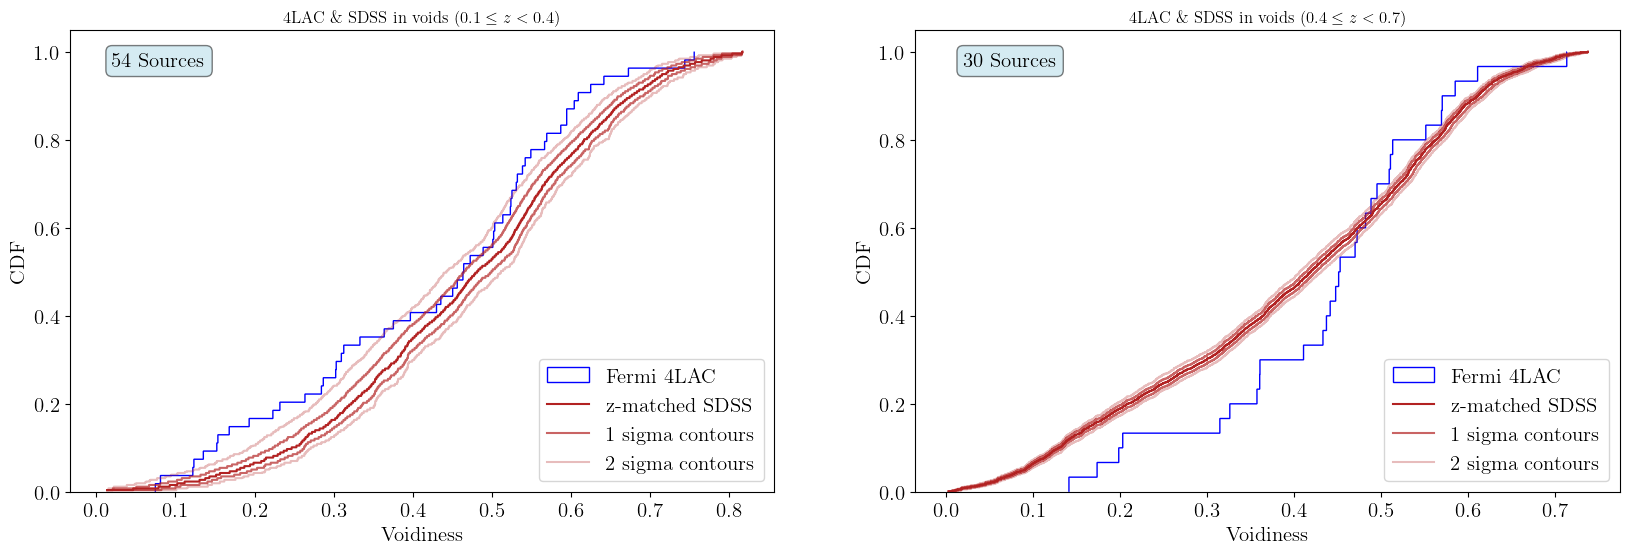

In [88]:
plt.figure(figsize = (20,6))

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-04_invoids.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,1)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC \& SDSS in voids ($0.1 \leq z < 0.4$)")
plt.text(0.02, 1, '54 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#-------------------------------------------------------
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_invoids.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,2)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC \& SDSS in voids ($0.4 \leq z < 0.7$)")
plt.text(0.02, 1, '30 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))


Text(0.02, 1, '30 Sources')

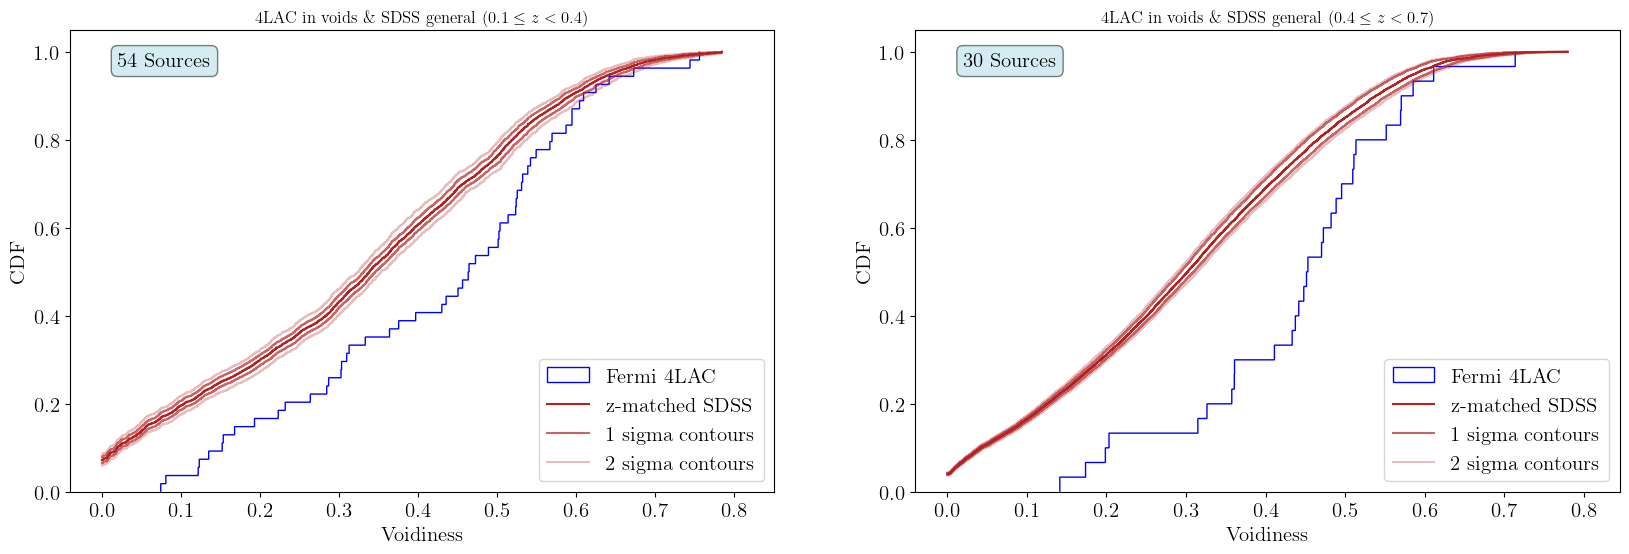

In [89]:
plt.figure(figsize = (20,6))

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-04_invoids_total.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,1)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC in voids \& SDSS general ($0.1 \leq z < 0.4$)")
plt.text(0.02, 1, '54 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#-------------------------------------------------------
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_invoids_total.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,2)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC in voids \& SDSS general ($0.4 \leq z < 0.7$)")
plt.text(0.02, 1, '30 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))


Text(0.02, 1, '21 Sources')

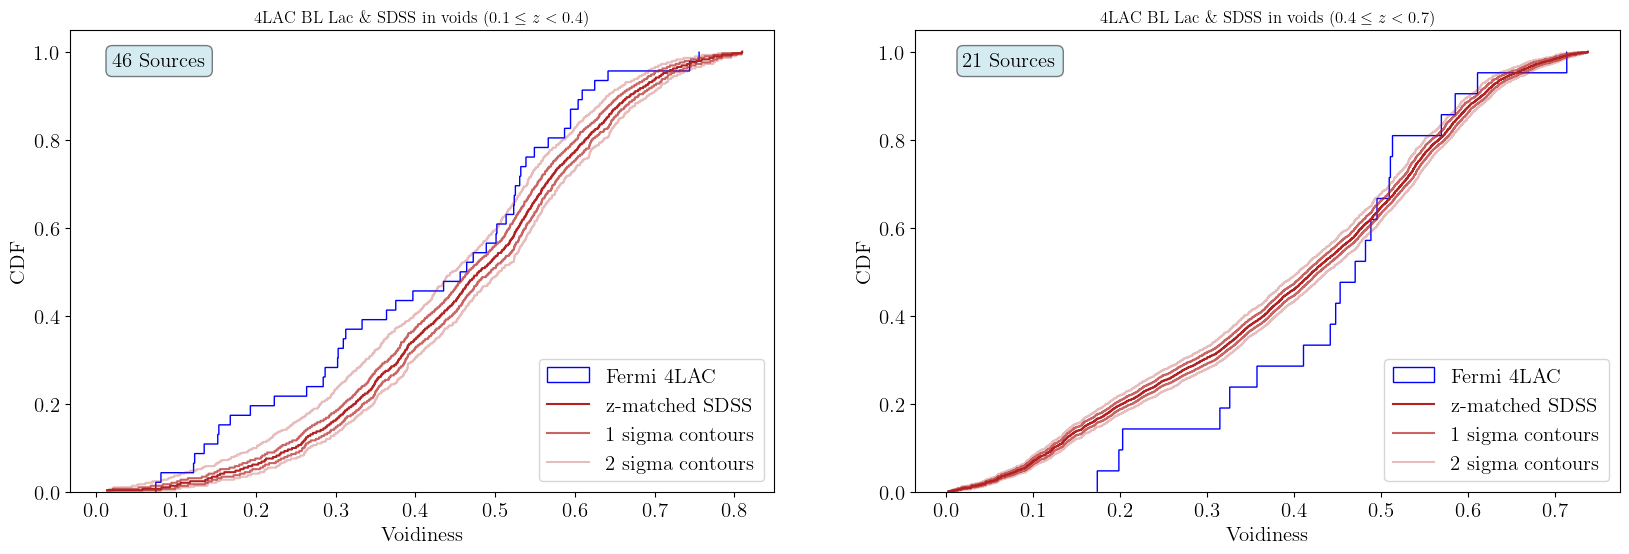

In [91]:
plt.figure(figsize = (20,6))

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-04_invoids_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids_bll.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,1)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC BL Lac \& SDSS in voids ($0.1 \leq z < 0.4$)")
plt.text(0.02, 1, '46 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#-------------------------------------------------------
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_invoids_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids_bll.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,2)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC BL Lac \& SDSS in voids ($0.4 \leq z < 0.7$)")
plt.text(0.02, 1, '21 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))


Text(0.02, 1, '21 Sources')

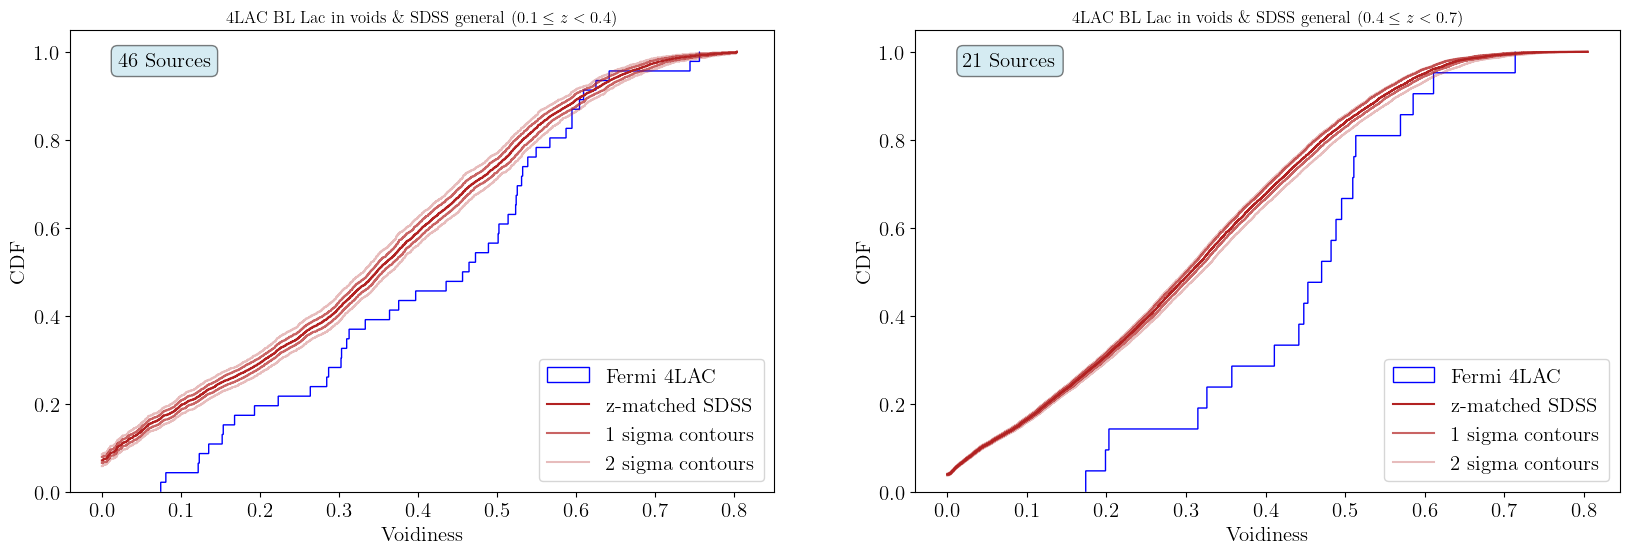

In [92]:
plt.figure(figsize = (20,6))

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-04_invoids_bll_total.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids_bll.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,1)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC BL Lac in voids \& SDSS general ($0.1 \leq z < 0.4$)")
plt.text(0.02, 1, '46 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#-------------------------------------------------------
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_invoids_bll_total.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids_bll.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,2)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC BL Lac in voids \& SDSS general ($0.4 \leq z < 0.7$)")
plt.text(0.02, 1, '21 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))


# Irrelevant Tests - checking things out

In [4]:
#not in voids

sdss_invoids = pd.read_excel('exported_dataFrames/sdsssutter_invoids.xlsx')
sdss = pd.read_excel('exported_dataFrames/sdsssutter_w_voidiness_dup_drop_above_z0_1.xlsx')

fourlac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
fourlac_invoids = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')

In [41]:
indices = []
for i in range(len(fourlac)):
    if fourlac.Source_Name[i] in fourlac_invoids.Source_Name.values:
        pass
    else:
        indices.append(i)


In [42]:
len(indices)

219

In [44]:
fourlac_notinvoids = fourlac.iloc[indices]
fourlac_notinvoids.to_excel('exported_dataFrames/4lacsutter_notinvoids.xlsx')

In [46]:
indices = []
for i in range(len(sdss)):
    if sdss.SDSS_NAME[i] in sdss_invoids.SDSS_NAME.values:
        pass
    else:
        indices.append(i)

In [48]:
sdss_notinvoids = sdss.iloc[indices]
sdss_notinvoids.to_excel('exported_dataFrames/sdsssutter_notinvoids.xlsx')

In [226]:
sdss_notinvoids

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,SDSS_NAME,RAdeg,DEdeg,PLATE,MJD,FIBERID,AUTOCLASS_PQN,...,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,SN_MEDIAN_ALL,cmvd_Mpc,Voidiness,Void_Dist_Mpc
1,5,5,5,b'074331.20+225539.2',115.880016,22.927580,4470,55587,142,QSO,...,0,84.645218,-132.694763,b'boss14',11074,12.7829,4.834815,2440.963321,0.245845,600.099209
2,13,13,13,b'074417.38+221410.7',116.072456,22.236319,11103,58488,317,QSO,...,0,-62.475685,-160.307037,b'eboss27',17635,15.0227,2.029319,2382.724916,0.287163,684.231258
10,36,36,36,b'074522.61+261455.3',116.344213,26.248697,11095,58439,16,QSO,...,0,310.125366,-28.325085,b'eboss27',17622,13.0277,2.357376,2437.138484,0.229362,558.987734
13,43,43,43,b'074541.75+225256.3',116.423971,22.882306,4470,55587,60,QSO,...,175,193.881516,-142.105026,b'boss14',11074,12.7829,2.562689,2459.114683,0.371350,913.191957
14,47,47,47,b'074550.92+230201.1',116.462169,23.033665,11103,58488,774,QSO,...,0,15.947250,13.221021,b'eboss27',17635,15.0227,8.150006,2474.494228,0.383680,949.412960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19746,75910,75910,75910,b'172102.59+314002.3',260.260800,31.667327,11654,58543,962,QSO,...,0,186.453033,113.245499,b'eboss3',16386,10.4121,2.647143,2202.123202,0.134321,295.792032
19747,75913,75913,75913,b'172118.94+303000.1',260.328944,30.500048,11654,58543,62,QSO,...,0,201.582977,-140.892670,b'eboss3',16386,10.4121,2.672547,1405.684184,0.087449,122.925515
19748,75914,75914,75914,b'172122.68+313010.2',260.344532,31.502840,4998,55722,144,QSO,...,0,117.811249,-140.879547,b'boss18',13531,10.9455,3.782367,2416.662120,0.122275,295.496749
19749,75917,75917,75917,b'172217.26+301710.0',260.571918,30.286116,11654,58543,47,QSO,...,0,247.979126,-187.193176,b'eboss3',16386,10.4121,3.184899,2474.060624,0.039522,97.779941


## no 4lac or sdss sources in voids (219 4LAC)

### low redshift (106)

KS: 0.08857

median P-value: 0.5227279030057423

Significance (one-tail): -0.05700125680084002 Sigma


### high redshift (113)

KS: 0.1885

median P-value: 0.0007069934950940025

Significance (one-tail): 3.191780588349994 Sigma

## 4lac not in voids, general SDSS pop (219 4LAC)

### 0.1 - 0.4 (106)

KS: 0.1736

median P-value: 0.010065836816306614

Significance (one-tail): 2.3238847161224063 Sigma (less voidy)

### 0.4 - 0.7 (113)

KS: 0.1543

median P-value: 0.009545818139424636

Significance (one-tail): 2.343736846943299 Sigma (more voidy)

Text(0.02, 1, '113 Sources')

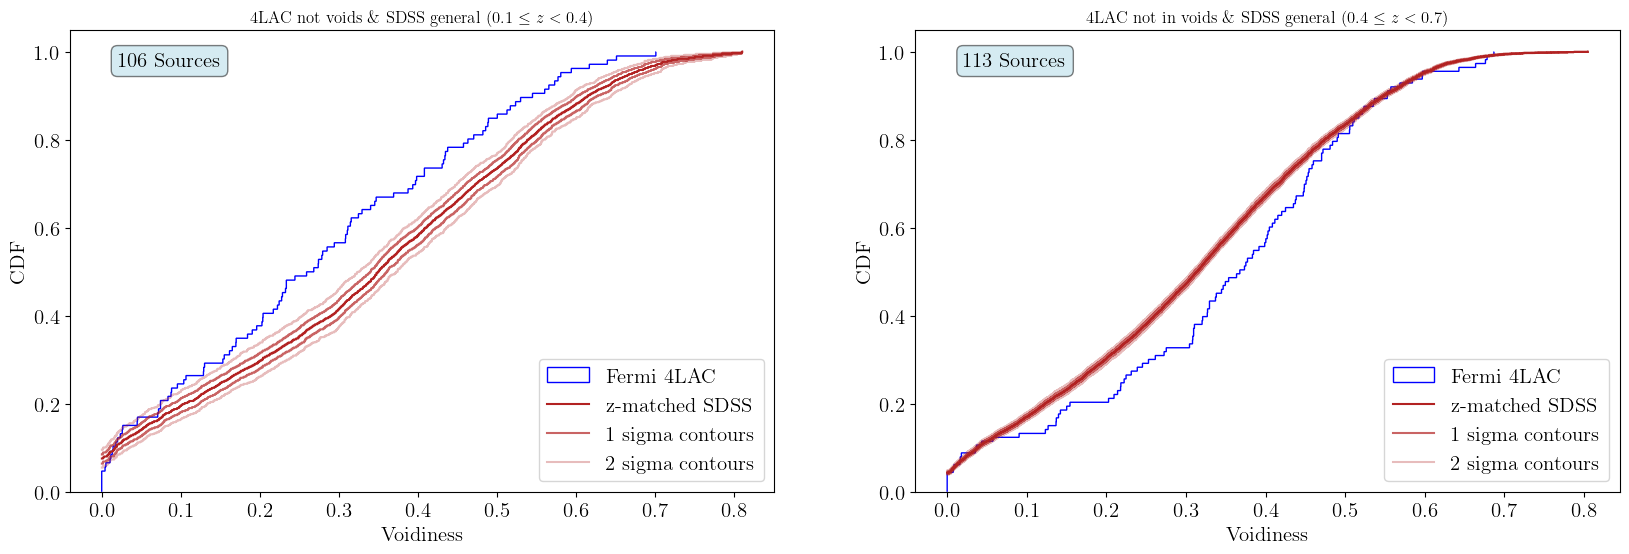

In [115]:
plt.figure(figsize = (20,6))

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-04_notinvoids_total.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_notinvoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,1)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC not voids \& SDSS general ($0.1 \leq z < 0.4$)")
plt.text(0.02, 1, '106 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#-------------------------------------------------------
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_notinvoids_total.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_notinvoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,2,2)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.title(r"4LAC not in voids \& SDSS general ($0.4 \leq z < 0.7$)")
plt.text(0.02, 1, '113 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))


In [52]:
fourlac_notinvoids_bll = fourlac_notinvoids[(fourlac_notinvoids.CLASS == 'b\'bll\'') | (fourlac_notinvoids.CLASS == 'b\'BLL\'')]





In [54]:
fourlac_notinvoids_bll.to_excel('exported_dataFrames/4lacsutter_notinvoids_bll.xlsx')

In [157]:
fourlac_notinvoids_bll[fourlac_notinvoids_bll.z < 0.4]

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,DEdeg,...,FluxInc25,FluxInc50,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45
1,1,1,1,1,1108,1108,4FGL J0749.2+2314,1,117.321701,23.233700,...,3.649036e-12,1.846592e-12,1.541935e-12,1.323569e-12,1.159380e-12,1.031430e-12,9.774921e-13,3.053028e-12,2.301279e-12,2.049014e-12
3,3,3,3,5,1132,1132,4FGL J0759.6+1321,1,119.900398,13.362700,...,8.132226e-12,4.128582e-12,3.449317e-12,2.961989e-12,2.595316e-12,2.309426e-12,2.188867e-12,6.811208e-12,5.140982e-12,4.579496e-12
4,4,4,4,6,1161,1161,4FGL J0809.3+3121,3,122.348000,31.353300,...,8.035482e-13,4.034177e-13,3.364108e-13,2.884927e-13,2.525235e-13,2.245292e-13,2.127373e-13,6.705342e-13,5.037569e-13,4.480382e-13
11,11,11,11,15,1194,1194,4FGL J0819.0+2746,1,124.763603,27.777201,...,1.319683e-12,6.613157e-13,5.513017e-13,4.726701e-13,4.136689e-13,3.677628e-13,3.484297e-13,1.100553e-12,8.261831e-13,7.346128e-13
12,12,12,12,16,1196,1196,4FGL J0819.4+4035,2,124.853996,40.596802,...,1.235909e-11,6.473725e-12,5.437916e-12,4.687851e-12,4.119621e-12,3.674253e-12,3.485828e-12,1.045765e-11,7.996981e-12,7.155180e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,282,282,305,2417,2417,4FGL J1554.9+2143,1,238.743500,21.733299,...,2.363450e-10,2.363450e-10,2.363450e-10,2.363450e-10,2.363450e-10,2.363450e-10,2.363450e-10,2.363450e-10,2.363450e-10,2.363450e-10
285,285,285,285,308,2435,2435,4FGL J1603.8+1104,1,240.960098,11.070100,...,4.183634e-11,2.352047e-11,2.001539e-11,1.741950e-11,1.541965e-11,1.383169e-11,1.315436e-11,3.619862e-11,2.851379e-11,2.577755e-11
286,286,286,286,309,2443,2443,4FGL J1606.2+1346,2,241.567993,13.768000,...,1.484774e-12,7.469105e-13,6.230582e-13,5.344380e-13,4.678882e-13,4.160771e-13,3.942487e-13,1.239815e-12,9.322181e-13,8.293391e-13
290,290,290,290,314,2468,2468,4FGL J1616.7+4107,1,244.182098,41.123402,...,9.520178e-13,4.773765e-13,3.980043e-13,3.412633e-13,2.986821e-13,2.655482e-13,2.515932e-13,7.941065e-13,5.962923e-13,5.302490e-13


## no 4lac or sdss sources in voids, BL Lac (157 4LAC)

### low redshift

KS: 0.0836

median P-value: 0.7085887782577887

Significance (one-tail): -0.5492666897175326 Sigma


### high redshift 

KS: 0.2259

median P-value: 0.0011230888144173794

Significance (one-tail): 3.0555905544372535 Sigma


## 4lac bl lac not in voids vs sdss general

### 0.1 - 0.4
KS: 0.1978

median P-value: 0.007092421043335146

Significance (one-tail): 2.4525480815425618 Sigma

### 0.4 - 0.7

KS: 0.1929

median P-value: 0.008428478777823715

Significance (one-tail): 2.389812906974145 Sigma

# DES

## DES BLAC (51 sources)

### low redshift

median P-value: 0.026318937152766363

Significance (one-tail): 1.937879920061402 Sigma

### high redshift

median P-value: 0.0017532933586041585

Significance (one-tail): 2.9194419721110836 Sigma



## KS test with sdss sources in voids (49 BL Lac sources)

### low redshift

KS: 0.1851

median P-value: 0.37631138283439053

Significance (one-tail): 0.31518292970181205 Sigma

### high redshift

KS: 0.3037

median P-value: 0.036474939937677704

Significance (one-tail): 1.7931441362529519 Sigma

## KS test with total sdss sources (49 BL lac sources)

### low redshift
KS: 0.2968

median P-value: 0.01611684008556843

Significance (one-tail): 2.141500723858763 Sigma

### high redshift

KS: 0.3948

median P-value: 0.001998917299451301

Significance (one-tail): 2.8783325488282854 Sigma

# Removing sources until same population size, seeing if result remains

In [94]:
fourlac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
sdss = pd.read_excel('exported_dataFrames/sdsssutter_w_voidiness_dup_drop_above_z0_1.xlsx')

In [95]:
#i want to randomly remove sources from 4lac population until we have same number 

fourlac_invoids = 84
sdss_invoids = 3768

fourlac_sampled = fourlac.sample(fourlac_invoids, random_state = 69)
sdss_sampled = sdss.sample(sdss_invoids, random_state = 70)

In [97]:
fourlac_sampled.to_excel('exported_dataFrames/4lacsutter_resampled1.xlsx')
sdss_sampled.to_excel('exported_dataFrames/sdsssutter_resampled1.xlsx')

## resampled 1

## 4lac in void vs. sdss in void

### 0.1 - 0.4 (42) 

KS: 0.1556

median P-value: 0.48414199329858304

Significance (one-tail): 0.03976060178526131 Sigma

### 0.4 - 0.7 (42)

KS: 0.2949

median P-value: 0.0013205936890043001

Significance (one-tail): 3.0066787292380655 Sigma

## 4lac in void vs. sdss general

### 0.1 - 0.4 

KS: 0.1314

median P-value: 0.47124012120045716

Significance (one-tail): 0.07215288162668015 Sigma

### 0.4 - 0.7

KS: 0.286

median P-value: 0.0016431433007529687

Significance (one-tail): 2.93960711304831 Sigma

In [101]:
fourlac_sampled = fourlac.sample(fourlac_invoids, random_state = 2)
sdss_sampled = sdss.sample(sdss_invoids, random_state = 3)


fourlac_sampled.to_excel('exported_dataFrames/4lacsutter_resampled2.xlsx')
sdss_sampled.to_excel('exported_dataFrames/sdsssutter_resampled2.xlsx')

## resampled 2

## "4lac in void vs. sdss in void"

### 0.1 - 0.4 (42) 

KS: 0.1342

median P-value: 0.5530117928605194

Significance (one-tail): -0.13327434756462694 Sigma

### 0.4 - 0.7 (42)

KS: 0.241

median P-value: 0.028509506587134973

Significance (one-tail): 1.9031650413118764 Sigma

## 4lac in void vs. sdss general

### 0.1 - 0.4 

KS: 0.1157

median P-value: 0.5709191475270052

Significance (one-tail): -0.1787147269174125 Sigma

### 0.4 - 0.7

KS: 0.2455

median P-value: 0.0199509621884521

Significance (one-tail): 2.054762764016512 Sigma

In [102]:
fourlac_sampled = fourlac.sample(fourlac_invoids, random_state = 5)
sdss_sampled = sdss.sample(sdss_invoids, random_state = 6)


fourlac_sampled.to_excel('exported_dataFrames/4lacsutter_resampled3.xlsx')
sdss_sampled.to_excel('exported_dataFrames/sdsssutter_resampled3.xlsx')

## resampled 3

## "4lac in void vs. sdss in void"

### 0.1 - 0.4 (42) 

KS: 0.1065

median P-value: 0.8416511390280278

Significance (one-tail): -1.0012670424884647 Sigma

### 0.4 - 0.7 (42)

KS: 0.1595

median P-value: 0.17687395776450238

Significance (one-tail): 0.9273440782202481 Sigma

## 4lac in void vs. sdss general

### 0.1 - 0.4 

KS: 0.1043

median P-value: 0.8032770755434082

Significance (one-tail): -0.8533849784906976 Sigma

### 0.4 - 0.7

KS: 0.1414

median P-value: 0.2712589041073025

Significance (one-tail): 0.6090100035774194 Sigma

In [179]:
fourlac_sampled = fourlac.sample(fourlac_invoids, random_state = 7)
sdss_sampled = sdss.sample(sdss_invoids, random_state = 8)


fourlac_sampled.to_excel('exported_dataFrames/4lacsutter_resampled4.xlsx')
sdss_sampled.to_excel('exported_dataFrames/sdsssutter_resampled4.xlsx')

## Resampled 4

84 4lac, 3768 sdss

### 0.1 - 0.4

KS: 0.1321

median P-value: 0.5425754345890452

Significance (one-tail): -0.10692417932863373 Sigma

### 0.4 - 0.7

KS: 0.2683

median P-value: 0.0076763639690982715

Significance (one-tail): 2.423949791198093 Sigma

84 4lac, total sdss

### 0.1 - 0.4

KS: 0.1246

median P-value: 0.47540563102974387

Significance (one-tail): 0.06168804309871204 Sigma

### 0.4 - 0.7

KS: 0.2638

median P-value: 0.008209908532624032

Significance (one-tail): 2.399447882454193 Sigma

In [189]:
fourlac_sampled = fourlac.sample(fourlac_invoids, random_state = 9)
sdss_sampled = sdss.sample(sdss_invoids, random_state = 10)


fourlac_sampled.to_excel('exported_dataFrames/4lacsutter_resampled5.xlsx')
sdss_sampled.to_excel('exported_dataFrames/sdsssutter_resampled5.xlsx')

## Resampled 5

84 4lac, 3678 SDSS

### 0.1 - 0.4

KS: 0.2014

median P-value: 0.16683098025410953

Significance (one-tail): 0.9667641287067413 Sigma

### 0.4 - 0.7

KS: 0.227

median P-value: 0.02715403908729453

Significance (one-tail): 1.924371148608066 Sigma

84 4lac, total sdss

### 0.1 - 0.4

KS: 0.1439

median P-value: 0.36681350642812216

Significance (one-tail): 0.34030478660641544 Sigma

### 0.4 - 0.7

KS: 0.233

median P-value: 0.018112558702647105

Significance (one-tail): 2.094391521690769 Sigma

In [190]:
resampled_invoid_ks = [0.2949,0.241,0.1595, 0.2683, 0.227]
resampled_invoid_p = [0.0013205936890043001,0.028509506587134973 ,0.17687395776450238, 0.0076763639690982715, 0.02715403908729453 ]
resampled_invoid_sigma = [3.0066787292380655,1.9031650413118764,0.9273440782202481,2.423949791198093, 1.924371148608066 ]

resampled_total_ks = [0.286,0.2455,0.1414, 0.2638,0.233  ]
resampled_total_p = [ 0.0016431433007529687,0.0199509621884521, 0.2712589041073025, 0.008209908532624032,0.018112558702647105 ]
resampled_total_sigma = [2.93960711304831,2.054762764016512,0.6090100035774194,2.399447882454193,2.094391521690769  ]


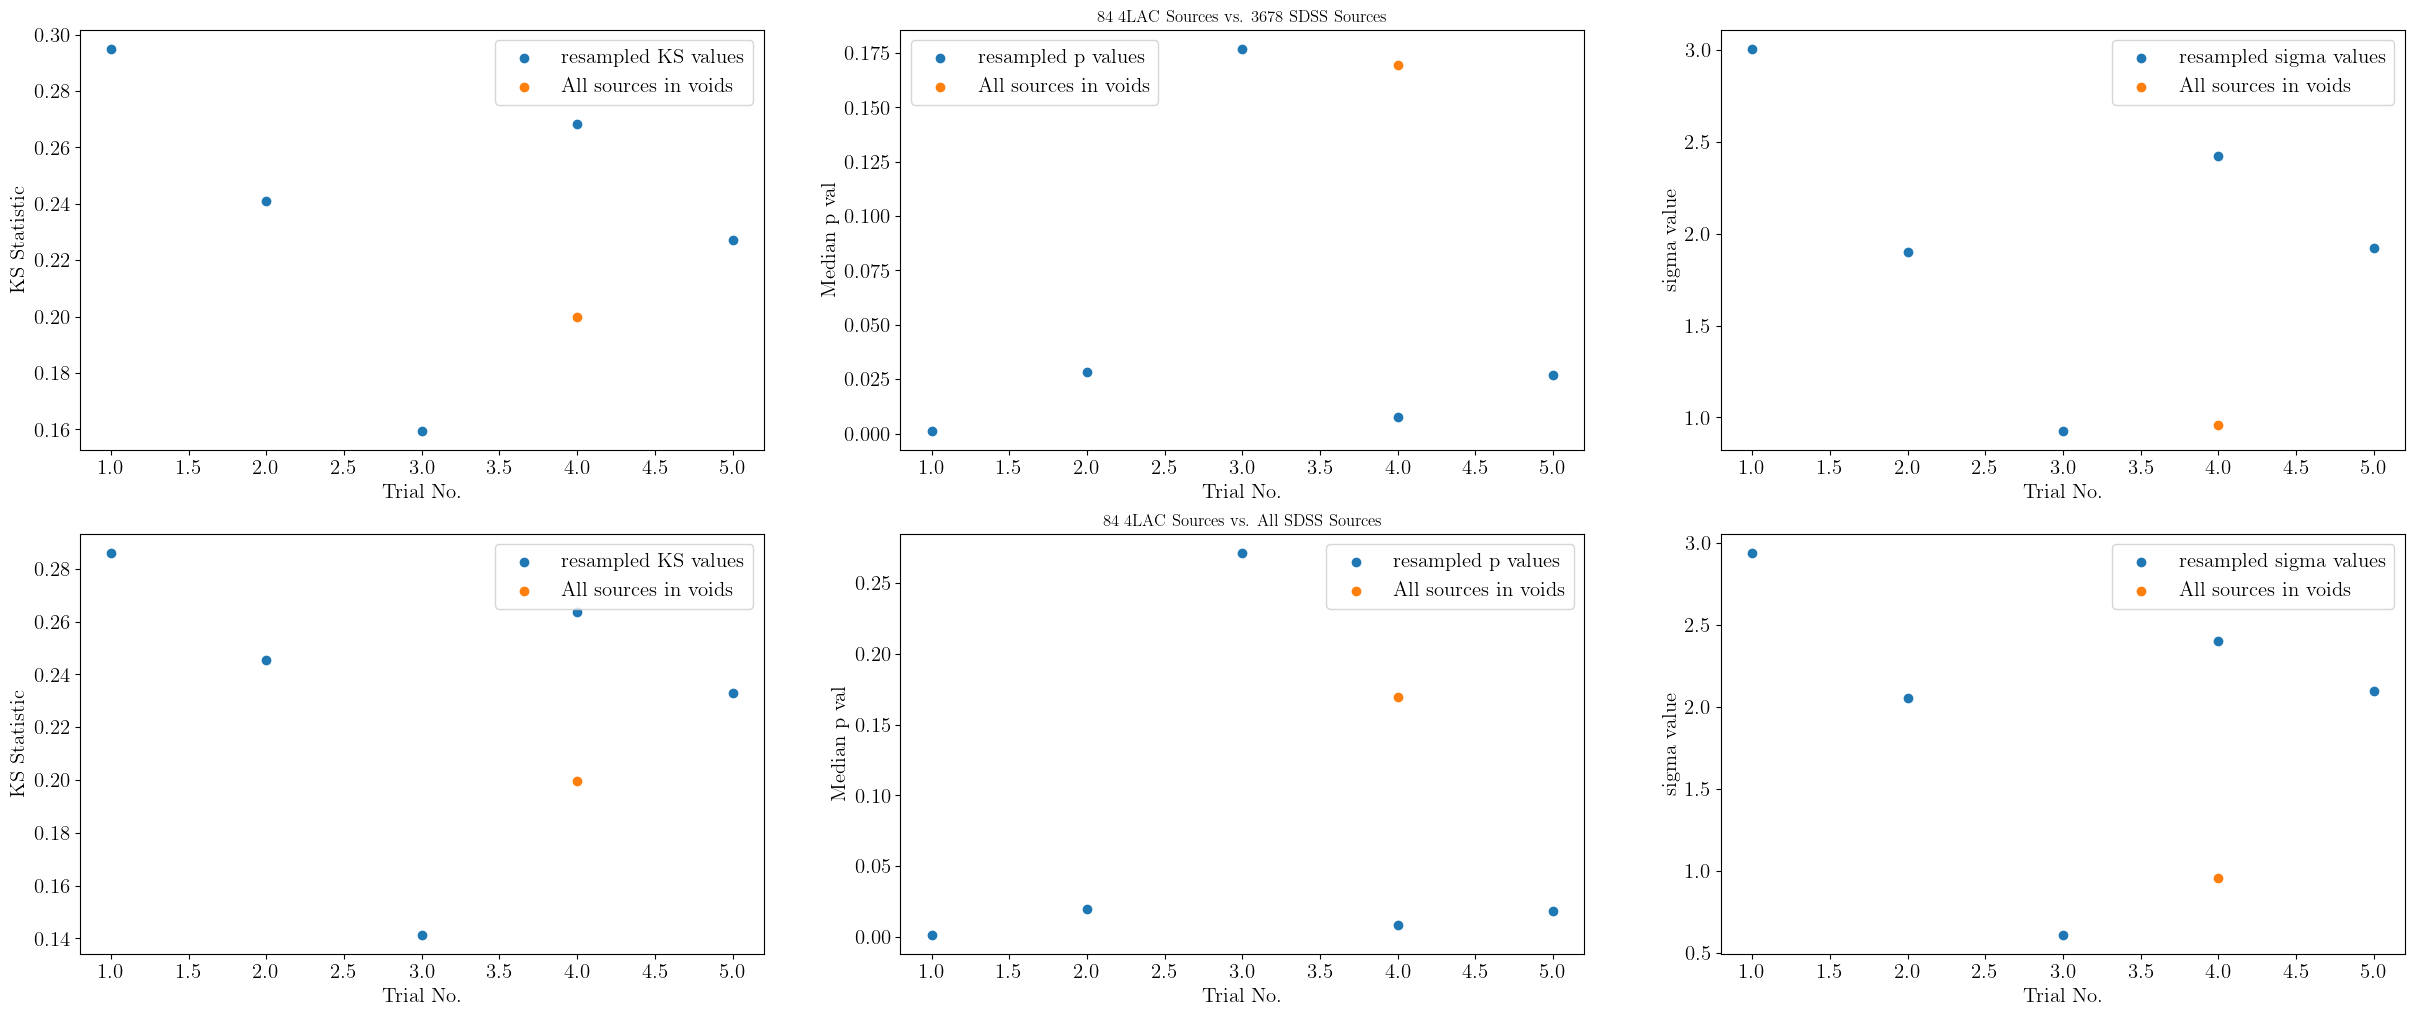

In [191]:
trials = [1,2,3,4,5]
plt.figure(figsize = (30,12))

plt.subplot(2,3,1)

plt.scatter(trials, resampled_invoid_ks, label = 'resampled KS values')
plt.scatter(4, 0.1997, label = 'All sources in voids')
plt.xlabel('Trial No.')
plt.ylabel('KS Statistic')
plt.legend()

plt.subplot(2,3,2)

plt.scatter(trials, resampled_invoid_p, label = 'resampled p values')
plt.scatter(4,0.16938931238802624 , label = 'All sources in voids')
plt.xlabel('Trial No.')
plt.ylabel('Median p val')
plt.title('84 4LAC Sources vs. 3678 SDSS Sources')
plt.legend()

plt.subplot(2,3,3)

plt.scatter(trials, resampled_invoid_sigma, label = 'resampled sigma values')
plt.scatter(4,0.9565813125932005  , label = 'All sources in voids')
plt.xlabel('Trial No.')
plt.ylabel('sigma value')
plt.legend()


plt.subplot(2,3,4)

plt.scatter(trials, resampled_total_ks, label = 'resampled KS values')
plt.scatter(4, 0.1997, label = 'All sources in voids')
plt.xlabel('Trial No.')
plt.ylabel('KS Statistic')
plt.legend()

plt.subplot(2,3,5)

plt.scatter(trials, resampled_total_p, label = 'resampled p values')
plt.scatter(4,0.16938931238802624 , label = 'All sources in voids')
plt.xlabel('Trial No.')
plt.ylabel('Median p val')
plt.title('84 4LAC Sources vs. All SDSS Sources')
plt.legend()

plt.subplot(2,3,6)

plt.scatter(trials, resampled_total_sigma, label = 'resampled sigma values')
plt.scatter(4,0.9565813125932005  , label = 'All sources in voids')
plt.xlabel('Trial No.')
plt.ylabel('sigma value')
plt.legend()

# Resampling in void/total and out of void/out of void

In [209]:
fourlac_distant = fourlac[fourlac.z >= 0.4]
sdss_distant = sdss[sdss.z >= 0.4]

In [212]:
sdss_notinvoids[sdss_notinvoids.z >= 0.4]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,SDSS_NAME,RAdeg,DEdeg,PLATE,MJD,FIBERID,AUTOCLASS_PQN,...,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,SN_MEDIAN_ALL,cmvd_Mpc,Voidiness,Void_Dist_Mpc
1,5,5,5,b'074331.20+225539.2',115.880016,22.927580,4470,55587,142,QSO,...,0,84.645218,-132.694763,b'boss14',11074,12.7829,4.834815,2440.963321,0.245845,600.099209
2,13,13,13,b'074417.38+221410.7',116.072456,22.236319,11103,58488,317,QSO,...,0,-62.475685,-160.307037,b'eboss27',17635,15.0227,2.029319,2382.724916,0.287163,684.231258
10,36,36,36,b'074522.61+261455.3',116.344213,26.248697,11095,58439,16,QSO,...,0,310.125366,-28.325085,b'eboss27',17622,13.0277,2.357376,2437.138484,0.229362,558.987734
13,43,43,43,b'074541.75+225256.3',116.423971,22.882306,4470,55587,60,QSO,...,175,193.881516,-142.105026,b'boss14',11074,12.7829,2.562689,2459.114683,0.371350,913.191957
14,47,47,47,b'074550.92+230201.1',116.462169,23.033665,11103,58488,774,QSO,...,0,15.947250,13.221021,b'eboss27',17635,15.0227,8.150006,2474.494228,0.383680,949.412960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19742,75897,75897,75897,b'171925.87+303124.4',259.857808,30.523454,11654,58543,142,QSO,...,0,113.079536,-136.397797,b'eboss3',16386,10.4121,5.508214,2248.941895,0.141162,317.464485
19746,75910,75910,75910,b'172102.59+314002.3',260.260800,31.667327,11654,58543,962,QSO,...,0,186.453033,113.245499,b'eboss3',16386,10.4121,2.647143,2202.123202,0.134321,295.792032
19748,75914,75914,75914,b'172122.68+313010.2',260.344532,31.502840,4998,55722,144,QSO,...,0,117.811249,-140.879547,b'boss18',13531,10.9455,3.782367,2416.662120,0.122275,295.496749
19749,75917,75917,75917,b'172217.26+301710.0',260.571918,30.286116,11654,58543,47,QSO,...,0,247.979126,-187.193176,b'eboss3',16386,10.4121,3.184899,2474.060624,0.039522,97.779941


In [213]:
fourlac_invoids_distant = 30
fourlac_outofvoids_distant = 113
sdss_total_distant = len(sdss_distant)
sdss_outofvoid_distant = 13736

In [263]:
fourlac_notinvoids = pd.read_excel('exported_dataFrames/4lacsutter_notinvoids.xlsx')
fourlac_invoids = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')

sdss_invoids = pd.read_excel('exported_dataFrames/sdsssutter_invoids.xlsx')
sdss_notinvoids = pd.read_excel('exported_dataFrames/sdsssutter_notinvoids.xlsx')

Text(0.5, 0, 'Voidiness')

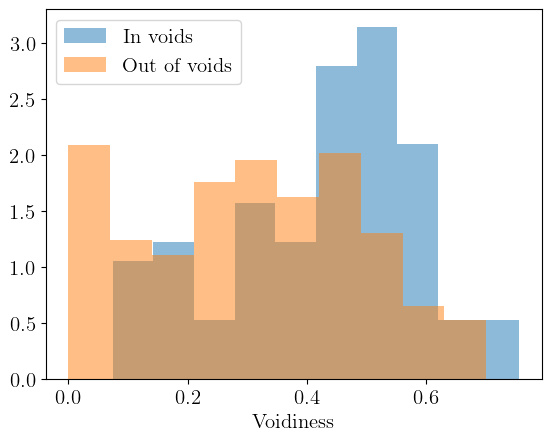

In [259]:
plt.hist(fourlac_invoids.Voidiness, density = True, alpha = 0.5, label = "In voids")
plt.hist(fourlac_notinvoids.Voidiness, density = True, alpha = 0.5, label = "Out of voids")
plt.legend()
plt.xlabel('Voidiness')

Text(0.5, 0, 'Voidiness')

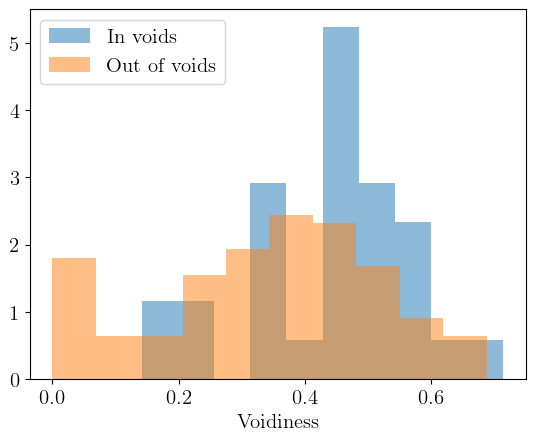

In [260]:
plt.hist(fourlac_invoids[fourlac_invoids.z >=0.4].Voidiness, density = True, alpha = 0.5, label = "In voids")
plt.hist(fourlac_notinvoids[fourlac_notinvoids.z >=0.4].Voidiness, density = True, alpha = 0.5, label = "Out of voids")
plt.legend()
plt.xlabel('Voidiness')

Text(0.5, 0, 'Voidiness')

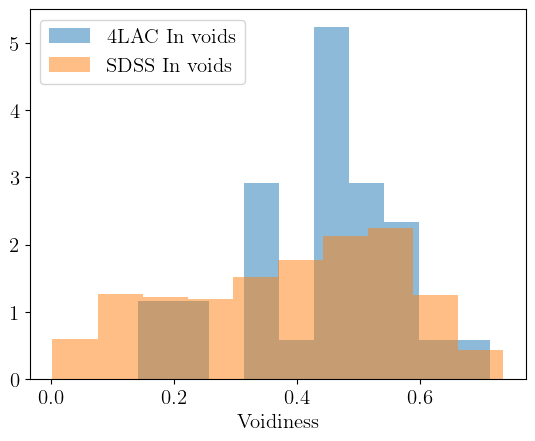

In [264]:
plt.hist(fourlac_invoids[fourlac_invoids.z >=0.4].Voidiness, density = True, alpha = 0.5, label = "4LAC In voids")
plt.hist(sdss_invoids[sdss_invoids.z >=0.4].Voidiness, density = True, alpha = 0.5, label = " SDSS In voids")
plt.legend()
plt.xlabel('Voidiness')

Text(0.5, 0, 'Voidiness')

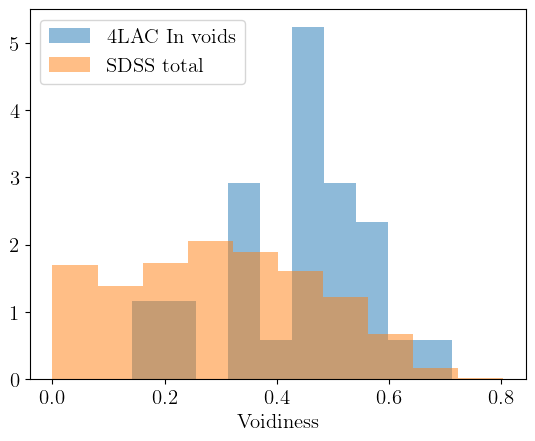

In [268]:
plt.hist(fourlac_invoids[fourlac_invoids.z >=0.4].Voidiness, density = True, alpha = 0.5, label = "4LAC In voids")
plt.hist(sdss[sdss.z >=0.4].Voidiness, density = True, alpha = 0.5, label = " SDSS total")
plt.legend()
plt.xlabel('Voidiness')

Text(0.5, 0, 'Voidiness')

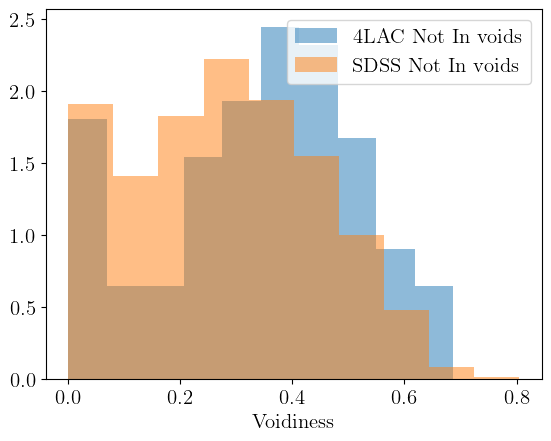

In [266]:
plt.hist(fourlac_notinvoids[fourlac_notinvoids.z >=0.4].Voidiness, density = True, alpha = 0.5, label = "4LAC Not In voids")
plt.hist(sdss_notinvoids[sdss_notinvoids.z >=0.4].Voidiness, density = True, alpha = 0.5, label = " SDSS Not In voids")
plt.legend()
plt.xlabel('Voidiness')

In [282]:
fourlac_invoids_distant = fourlac_invoids[fourlac_invoids.z >= 0.4]
fourlac_invoids_dist_HSP = fourlac_invoids_distant[fourlac_invoids_distant.SED_class == 'HSP']
fourlac_invoids_dist_ISP = fourlac_invoids_distant[fourlac_invoids_distant.SED_class == 'ISP']
fourlac_invoids_dist_LSP = fourlac_invoids_distant[fourlac_invoids_distant.SED_class == 'LSP']
fourlac_invoids_dist_nan = fourlac_invoids_distant[fourlac_invoids_distant.SED_class == np.nan]

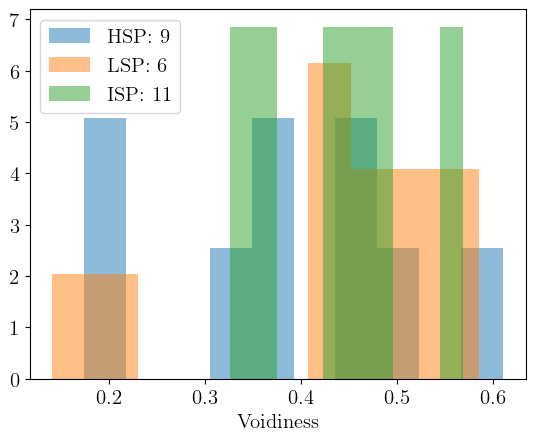

In [293]:
plt.hist(fourlac_invoids_dist_HSP.Voidiness,alpha = 0.5,  density = True, label = 'HSP: 9 ')
plt.hist(fourlac_invoids_dist_LSP.Voidiness,alpha = 0.5, density = True, label = 'LSP: 6')
plt.hist(fourlac_invoids_dist_ISP.Voidiness, alpha = 0.5,  density = True, label = 'ISP: 11')

plt.xlabel('Voidiness')
plt.legend()

Text(0.5, 0, 'Voidiness')

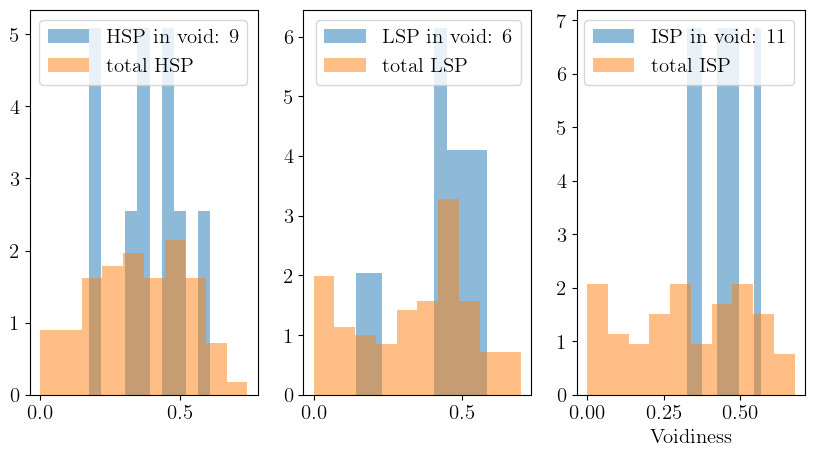

In [304]:
plt.figure(figsize = (10,5))

plt.subplot(1,3,1)
plt.hist(fourlac_invoids_dist_HSP.Voidiness,alpha = 0.5,  density = True, label = 'HSP in void: 9 ')
plt.hist(fourlac[fourlac.SED_class == 'HSP'].Voidiness,alpha = 0.5, density = True, label = 'total HSP')
plt.legend()

plt.subplot(1,3,2)
plt.hist(fourlac_invoids_dist_LSP.Voidiness,alpha = 0.5,  density = True, label = 'LSP in void: 6 ')
plt.hist(fourlac[fourlac.SED_class == 'LSP'].Voidiness,alpha = 0.5, density = True, label = 'total LSP')
plt.legend()

plt.subplot(1,3,3)
plt.hist(fourlac_invoids_dist_ISP.Voidiness,alpha = 0.5,  density = True, label = 'ISP in void: 11 ')
plt.hist(fourlac[fourlac.SED_class == 'ISP'].Voidiness,alpha = 0.5, density = True, label = 'total ISP')
plt.legend()

plt.xlabel('Voidiness')


In [249]:
fourlac_resampled = fourlac.sample(fourlac_invoids_distant, random_state = 19)
#sdss_resampled = sdss.sample(sdss_total_distant, random_state = 4)

fourlac_resampled.to_excel('exported_dataFrames/4lacsutter_invoids_resample10.xlsx')
#sdss_resampled.to_excel('exported_dataFrames/sdsssutter_total_resampled1.xlsx')

## Resample 1

KS: 0.151

median P-value: 0.8366907606265538

Significance (one-tail): -0.9809478103854801 Sigma

## Resample 2

KS: 0.33

median P-value: 0.04779877248626368

Significance (one-tail): 1.6665820279277737 Sigma

## Resample 3

KS: 0.1998

median P-value: 0.4509790245571614

Significance (one-tail): 0.12318822565917312 Sigma

## Resample 4

KS: 0.3859

median P-value: 0.0758661512720117

Significance (one-tail): 1.4334394102772168 Sigma

## Resample 5

KS: 0.2395

median P-value: 0.34447026816970727

Significance (one-tail): 0.40029325362967555 Sigma

## Resample 6

KS: 0.4029

median P-value: 0.010472738954587887

Significance (one-tail): 2.3089658217224316 Sigma

## Resample 7

KS: 0.4212

median P-value: 0.013444828262905101

Significance (one-tail): 2.2131158950536403 Sigma

## Resample 8

KS: 0.3852

median P-value: 0.016782821917080377

Significance (one-tail): 2.1252513682708996 Sigma

## Resample 9 

KS: 0.2998

median P-value: 0.11043004193364436

Significance (one-tail): 1.224244295312178 Sigma

## Resample 10

KS: 0.23

median P-value: 0.5339682620590275

Significance (one-tail): -0.08524894978858936 Sigma


In [186]:
fourlacinvoid_v_total_KS = [0.151, 0.33, 0.1998, 0.3859, 0.2395, 0.4029, 0.4212, 0.3852, 0.2998, 0.23]
fourlacinvoid_v_total_p = [0.8366907606265538,0.04779877248626368 , 0.4509790245571614, 0.0758661512720117, 0.34447026816970727, 0.010472738954587887, 0.013444828262905101,0.016782821917080377, 0.11043004193364436, 0.5339682620590275]
fourlacinvoid_v_total_sigma = [-0.9809478103854801,1.6665820279277737, 0.12318822565917312, 1.4334394102772168,  0.40029325362967555, 2.3089658217224316, 2.2131158950536403, 2.1252513682708996,1.224244295312178, -0.08524894978858936 ]

KS =  0.4154

p_val =  3.5874043558081474e-05

sigma =  3.970413216152418 


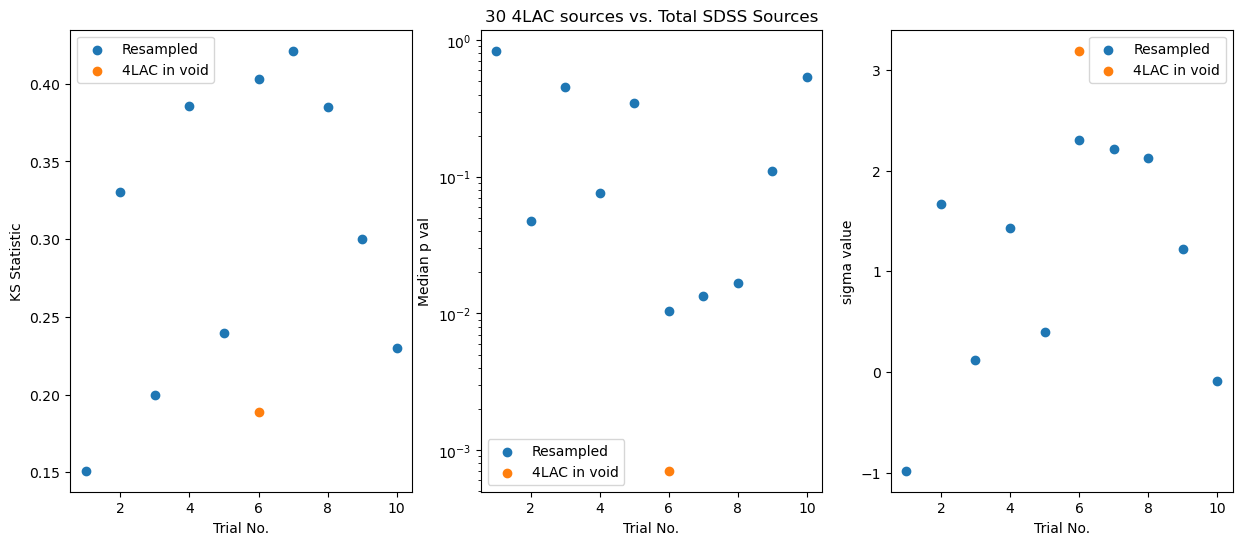

In [191]:
trials = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)

plt.scatter(trials, fourlacinvoid_v_total_KS, label = 'Resampled')
plt.scatter(6, KS, label = '4LAC in void')
plt.xlabel('Trial No.')
plt.ylabel('KS Statistic')
plt.legend()

plt.subplot(1,3,2)

plt.scatter(trials, fourlacinvoid_v_total_p, label = 'Resampled')
plt.scatter(6,p_val , label = '4LAC in void')
plt.xlabel('Trial No.')
plt.ylabel('Median p val')
plt.yscale('log')
plt.title('30 4LAC sources vs. Total SDSS Sources')
plt.legend()

plt.subplot(1,3,3)

plt.scatter(trials, fourlacinvoid_v_total_sigma, label = 'Resampled')
plt.scatter(6,sigma  , label = '4LAC in void')
plt.xlabel('Trial No.')
plt.ylabel('sigma value')
plt.legend()

In [242]:
fourlac_resampled = fourlac.sample(fourlac_outofvoids_distant, random_state = 33)
#sdss_resampled = sdss_notinvoids.sample(len(sdss_notinvoids), random_state = 21)

fourlac_resampled.to_excel('exported_dataFrames/4lacsutter_notinvoids_resample10.xlsx')
#sdss_resampled.to_excel('exported_dataFrames/sdsssutter_notinvoids_resampled5.xlsx')

## Resample 1

KS: 0.286

median P-value: 6.561451359797834e-05

Significance (one-tail): 3.8241405795632484 Sigma

## Resample 2

KS: 0.3166

median P-value: 3.807669687475918e-05

Significance (one-tail): 3.9561937858894596 Sigma


## Resample 3

KS: 0.2749

median P-value: 0.0011817850525358026

Significance (one-tail): 3.040281641982972 Sigma

## Resample 4

KS: 0.2292

median P-value: 0.0050229548189373785

Significance (one-tail): 2.5742450414041427 Sigma

## Resample 5

KS: 0.3056

median P-value: 9.978643602839591e-05

Significance (one-tail): 3.719556537544831 Sigma

## Resample 6

KS: 0.2267

median P-value: 0.005175390230251512

Significance (one-tail): 2.5638850972125957 Sigma

## Resample 7

KS: 0.2655

median P-value: 0.001112848122908882

Significance (one-tail): 3.058336327110742 Sigma

## Resample 8

KS: 0.2

median P-value: 0.022783439440844648

Significance (one-tail): 1.9993834716040535 Sigma

## Resample 9

KS: 0.2617

median P-value: 0.0012272101315817453

Significance (one-tail): 3.0289047836341125 Sigma

## Resample 10

KS: 0.1921

median P-value: 0.053168344286712695

Significance (one-tail): 1.6148799796635547 Sigma

In [188]:
fourlacnotinvoid_v_total_KS = [0.286, 0.3166, 0.2749, 0.2292, 0.3056, 0.2267,0.2655, 0.2,0.2617, 0.1921  ]
fourlacnotinvoid_v_total_p = [6.561451359797834e-05, 3.807669687475918e-05, 0.0011817850525358026, 0.0050229548189373785, 9.978643602839591e-05, 0.005175390230251512, 0.001112848122908882, 0.022783439440844648, 0.0012272101315817453, 0.053168344286712695]
fourlacnotinvoid_v_total_sigma = [3.8241405795632484, 3.9561937858894596, 3.040281641982972, 2.5742450414041427,3.719556537544831, 2.5638850972125957, 3.058336327110742, 1.9993834716040535, 3.0289047836341125, 1.6148799796635547]

KS =  0.1885

p_val =  0.0007069934950940025

sigma =  3.191780588349994 

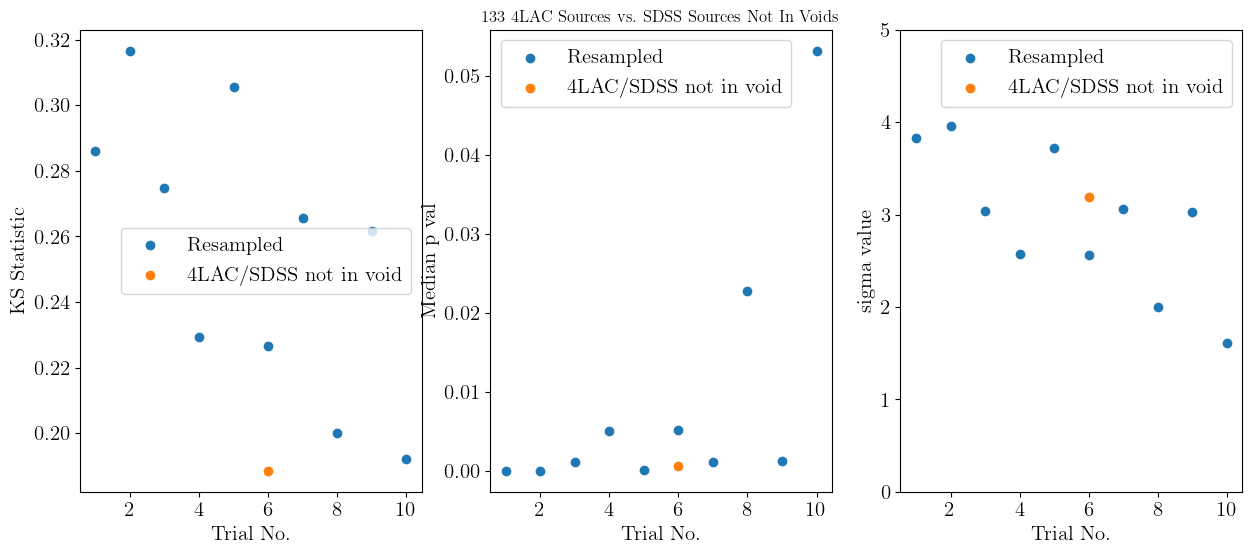

In [189]:
trials = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)

plt.scatter(trials, fourlacnotinvoid_v_total_KS, label = 'Resampled')
plt.scatter(6, KS, label = '4LAC/SDSS not in void')
plt.xlabel('Trial No.')
plt.ylabel('KS Statistic')
plt.legend()

plt.subplot(1,3,2)

plt.scatter(trials, fourlacnotinvoid_v_total_p, label = 'Resampled')
plt.scatter(6,p_val , label = '4LAC/SDSS not in void')
plt.xlabel('Trial No.')
plt.ylabel('Median p val')
plt.title('133 4LAC Sources vs. SDSS Sources Not In Voids')
plt.legend()

plt.subplot(1,3,3)

plt.scatter(trials, fourlacnotinvoid_v_total_sigma, label = 'Resampled')
plt.scatter(6,sigma  , label = '4LAC/SDSS not in void')
plt.xlabel('Trial No.')
plt.ylabel('sigma value')
plt.ylim(0,5)
plt.legend()

# How much voidiness can be attributed to the void that the source is in?

In [95]:
#fourlac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
sutter = pd.read_excel('processedsutter_voids.xlsx')

In [96]:
fourlac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')

In [97]:
# Function to convert RA, DEC, redshift to 3D coordinates (x, y, z)

def get_3d_coordinates(ra, dec, redshift, distance):
    # Assuming the redshift corresponds to a comoving distance
    # For simplicity, assume a cosmology where distance in Mpc is proportional to redshift
    # Convert RA, DEC to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    
    # Spherical to Cartesian conversion
    x = (distance * np.cos(dec_rad) * np.cos(ra_rad)).values #Mpc
    y = (distance * np.cos(dec_rad) * np.sin(ra_rad)).values #Mpc
    z = (distance * np.sin(dec_rad)).values #Mpc
  
    locs = []
    for i in range(len(x)):
        locs.append([x[i], y[i], z[i]])
    
    return np.asarray(locs)

In [98]:
source_coords = get_3d_coordinates(fourlac['RAdeg'], fourlac['DEdeg'], fourlac['z'], fourlac['cmvd_Mpc'])
sphere_coords = get_3d_coordinates(sutter['RAdeg'], sutter['DEdeg'], sutter['z'], sutter['cmvd_Mpc'])

In [99]:

# Checking if point sources are inside any sphere

fourlac_invoids_voidinfo = []

for j in range(len(source_coords)):
    for i in range(len(sphere_coords)):
        distance = np.linalg.norm(source_coords[j] - sphere_coords[i])
        
        if distance <= sutter.iloc[i]['Reff_Mpc']:
            fourlac_invoids_voidinfo.append((j,i)) #tuple with the source index first and void index second

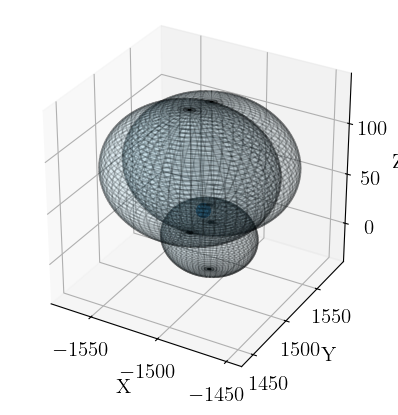

In [363]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of spherical angles
u = np.linspace(0, 2 * np.pi, 100)  # azimuthal angle
v = np.linspace(0, np.pi, 100)      # polar angle

# Sphere of radius r, centered at (cx, cy, cz)
r = sutter.loc[760, 'Reff_Mpc']
cx, cy, cz = sphere_coords[760][0], sphere_coords[760][1], sphere_coords[760][2]

# Parametric equations for the sphere
x = cx + r * np.outer(np.cos(u), np.sin(v))
y = cy + r * np.outer(np.sin(u), np.sin(v))
z = cz + r * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='skyblue', alpha=0.1, edgecolor='k')

# Sphere of radius r, centered at (cx, cy, cz)
r = sutter.loc[3829, 'Reff_Mpc']
cx, cy, cz = sphere_coords[3829][0], sphere_coords[3829][1], sphere_coords[3829][2]

# Parametric equations for the sphere
x = cx + r * np.outer(np.cos(u), np.sin(v))
y = cy + r * np.outer(np.sin(u), np.sin(v))
z = cz + r * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, color='skyblue', alpha=0.1, edgecolor='k')

# Sphere of radius r, centered at (cx, cy, cz)
r = sutter.loc[4420, 'Reff_Mpc']
cx, cy, cz = sphere_coords[4420][0], sphere_coords[4420][1], sphere_coords[4420][2]

# Parametric equations for the sphere
x = cx + r * np.outer(np.cos(u), np.sin(v))
y = cy + r * np.outer(np.sin(u), np.sin(v))
z = cz + r * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, color='skyblue', alpha=0.1, edgecolor='k')

ax.scatter(source_coords[37][0],source_coords[37][1], source_coords[37][2], s = 100 )

# Set aspect ratio and labels
ax.set_box_aspect([1,1,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [100]:
seen = set()
flac_invoids_dup_drop = []

for t in fourlac_invoids_voidinfo:
    if t[0] not in seen:
        seen.add(t[0])
        flac_invoids_dup_drop.append(t)

In [101]:
len(flac_invoids_dup_drop) #confirmed

84

In [102]:
fourlac_invoids = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')

In [103]:
fourlac_invoids = fourlac_invoids.set_index('Unnamed: 0.6')

In [104]:
for t in flac_invoids_dup_drop:
    fourlac_invoids.loc[t[0],'Voidiness_Cut'] = (fourlac_invoids.loc[t[0], 'Void_Dist_Mpc'] - sutter.loc[t[1], 'Reff_Mpc'])/fourlac_invoids.loc[t[0],'cmvd_Mpc']


In [105]:
fourlac_invoids["Voidi-Oidyness"] = fourlac_invoids.Voidiness - fourlac_invoids.Voidiness_Cut

In [107]:
fourlac_invoids.to_excel('exported_dataFrames/4lacsutter_invoids.xlsx')

(array([1.7492957 , 1.32353788, 1.62925825, 1.93310304, 1.83619781,
        1.6105024 , 1.2710215 , 0.72084987, 0.23632372, 0.0381369 ]),
 array([0.        , 0.08098329, 0.16196657, 0.24294986, 0.32393314,
        0.40491643, 0.48589971, 0.566883  , 0.64786628, 0.72884957,
        0.80983286]),
 <BarContainer object of 10 artists>)

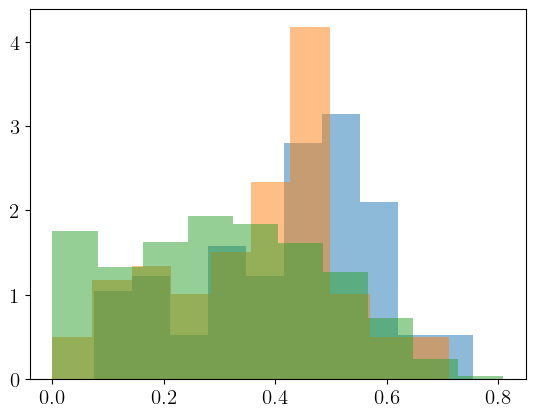

In [381]:
plt.hist(fourlac_invoids.Voidiness, alpha = 0.5, density = True)
plt.hist(fourlac_invoids.Voidiness_Cut, alpha = 0.5, density = True)
plt.hist(sdss.Voidiness, alpha = 0.5,density = True)

## comparing cut voidiness distributions

KS: 0.3619

median P-value: 0.0005241097362661033

Significance (one-tail): 3.277254214384298 Sigma

3.2 sigma more voidy

(array([39., 29.,  7.,  4.,  2.,  1.,  0.,  0.,  0.,  2.]),
 array([0.03692003, 0.13322803, 0.22953602, 0.32584402, 0.42215202,
        0.51846002, 0.61476801, 0.71107601, 0.80738401, 0.903692  ,
        1.        ]),
 <BarContainer object of 10 artists>)

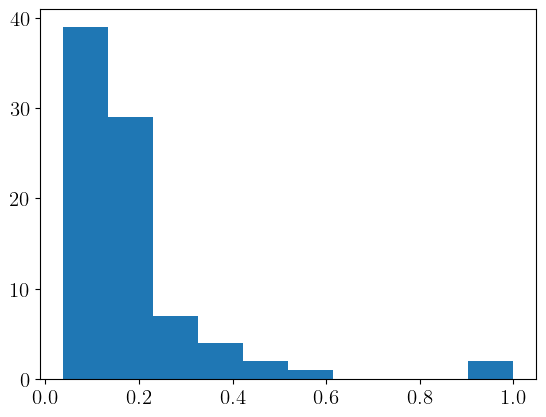

In [384]:
plt.hist(fourlac_invoids["Voidi-Oidyness"])

In [108]:
fourlac_invoids[['Voidiness', 'Voidiness_Cut', 'Voidi-Oidyness']]

,Voidiness,Voidiness_Cut,Voidi-Oidyness
Unnamed: 0.6,,,
5,0.451629,0.402837,0.048792
9,0.624907,0.578045,0.046862
22,0.303398,0.241376,0.062023
23,0.152306,0.092971,0.059335
36,0.081320,0.001176,0.080144
...,...,...,...
292,0.551762,0.495308,0.056454
293,0.123669,0.069141,0.054528
297,0.361247,0.334024,0.027223


In [109]:
# do it more precisely with the actual amount of void, not just subtracting off the void radius?
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
import intervals as I

sutter_voids = pd.read_excel('processedsutter_voids.xlsx')
fourlac_invoids = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
fourlac_invoids = fourlac_invoids.sort_values(by = 'cmvd_Mpc', ascending = False)
fourlac_invoids_dist = fourlac_invoids[fourlac_invoids.z >= 0.4]

In [110]:
from voidiness import voidy_analysis

In [111]:
output, intersect_data = voidy_analysis(sutter_voids, fourlac_invoids)

In [112]:
intersect_data = {key: intersect_data[key] for key in output.index if key in intersect_data}

In [113]:
intervals = intersect_data[0]['intervals']

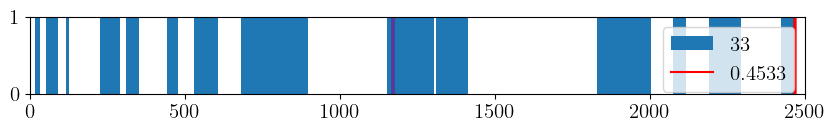

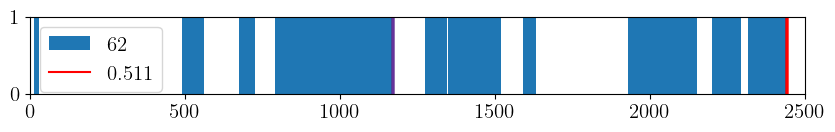

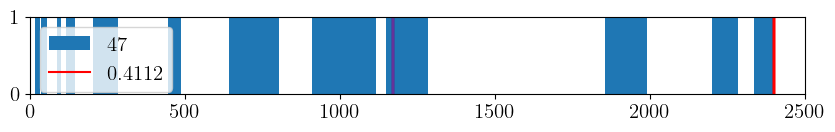

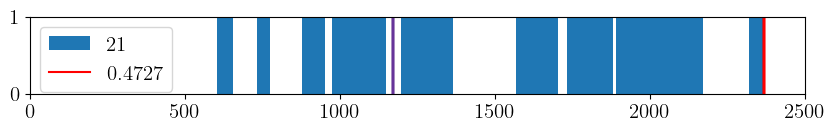

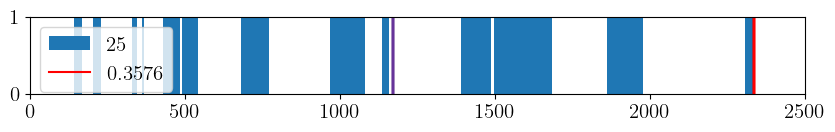

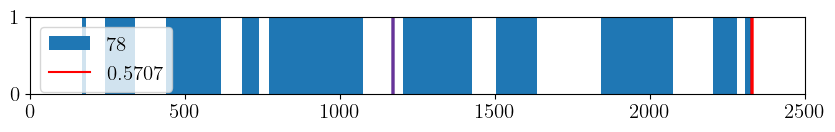

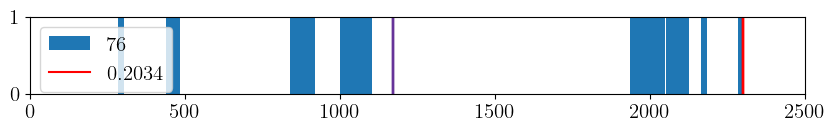

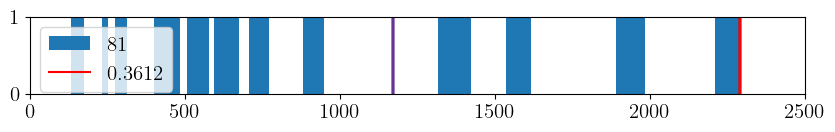

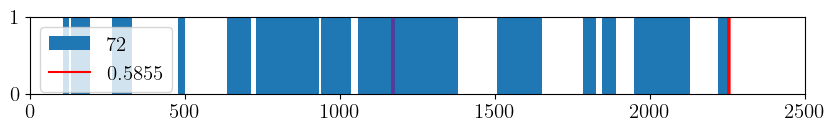

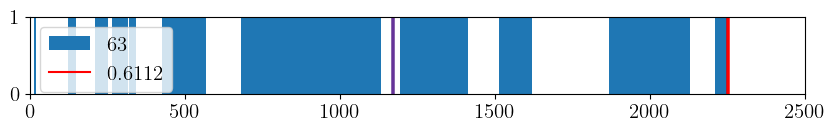

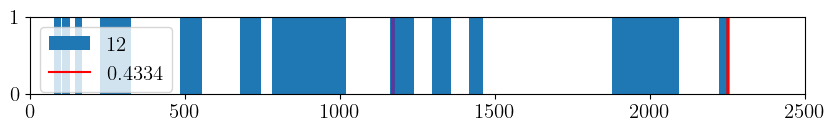

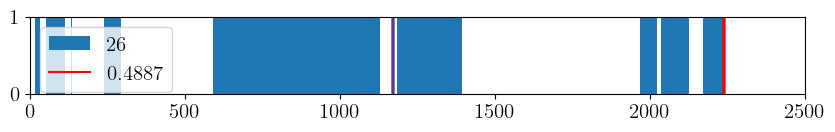

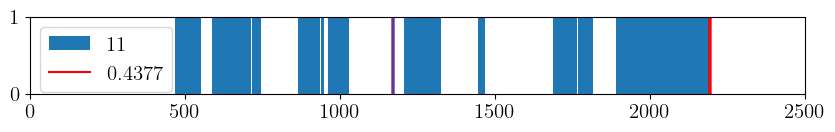

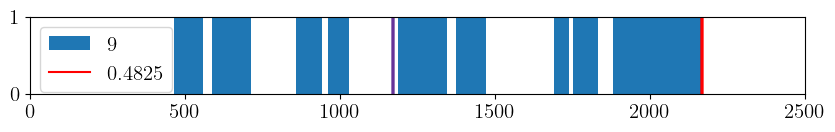

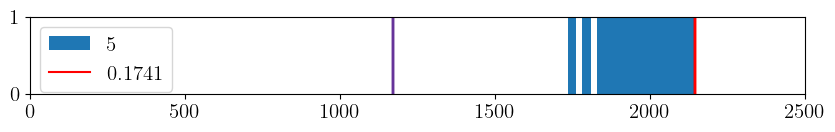

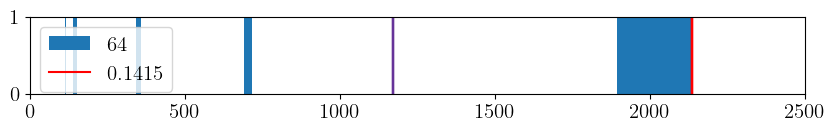

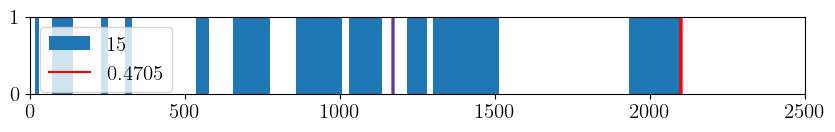

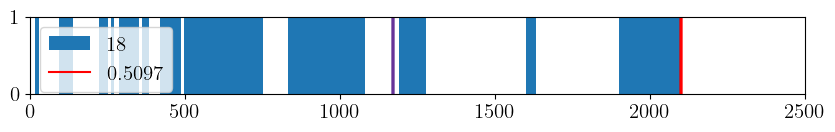

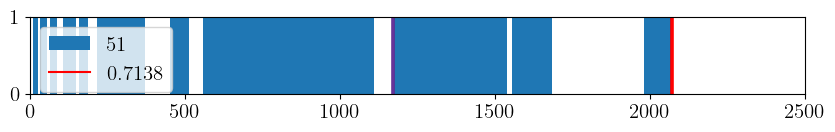

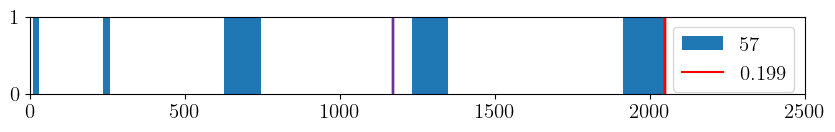

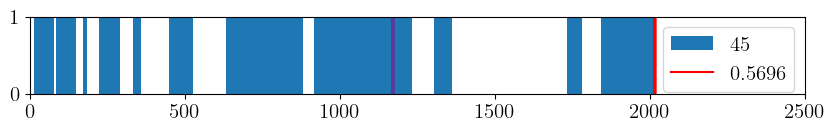

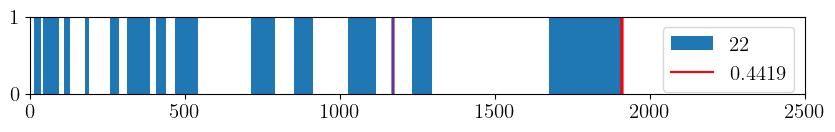

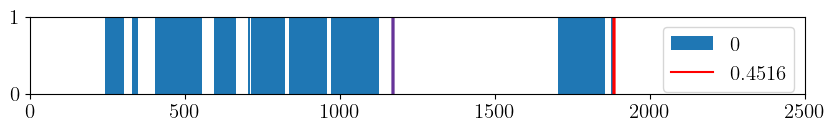

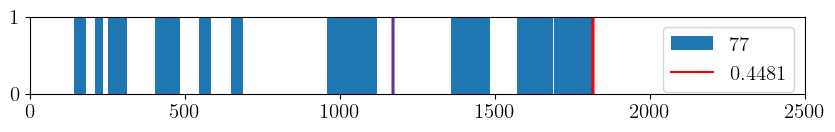

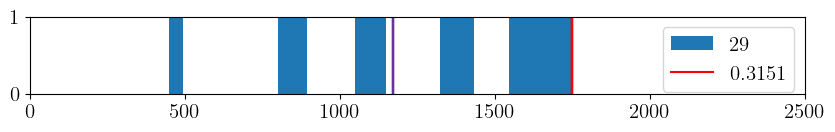

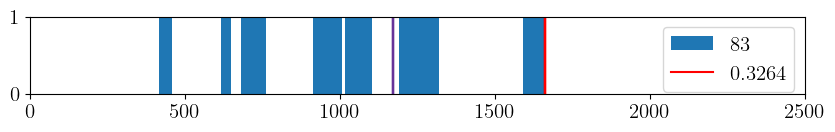

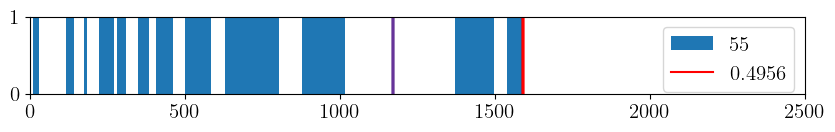

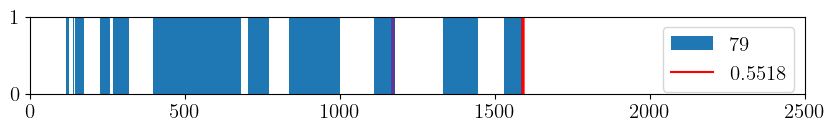

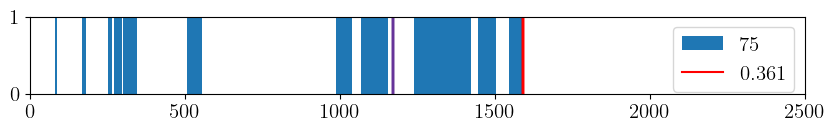

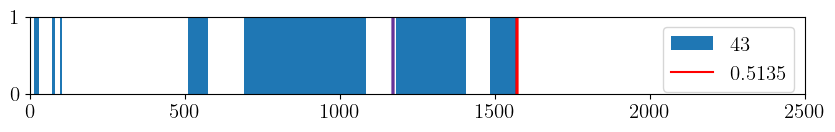

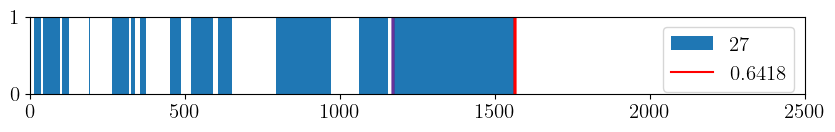

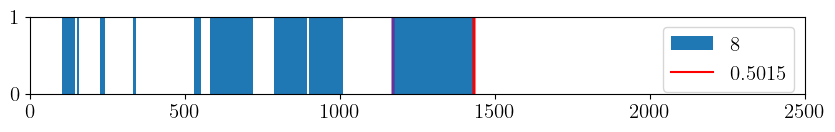

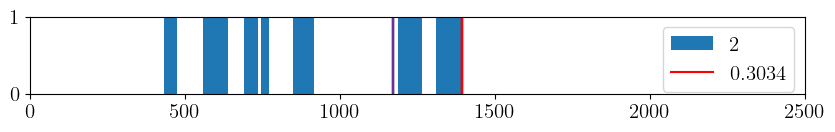

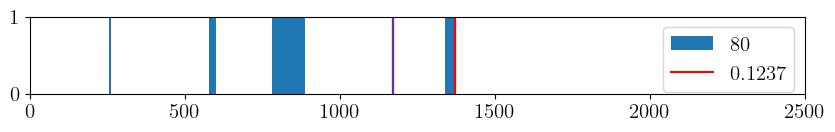

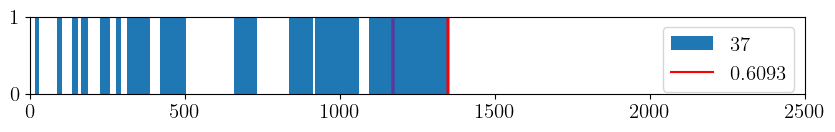

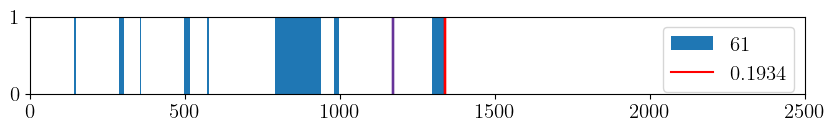

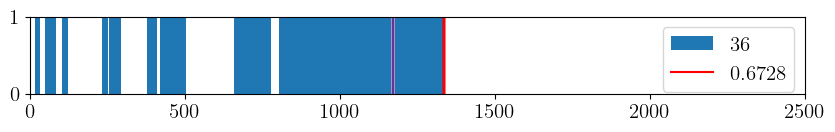

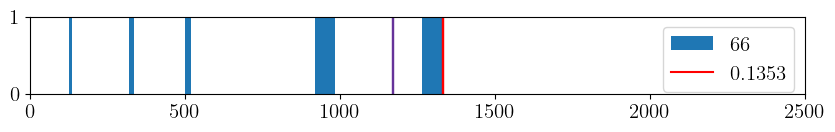

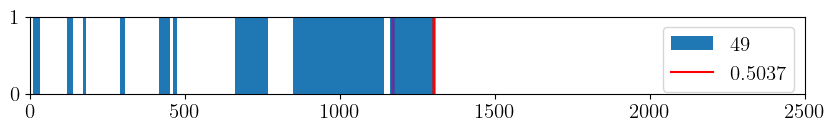

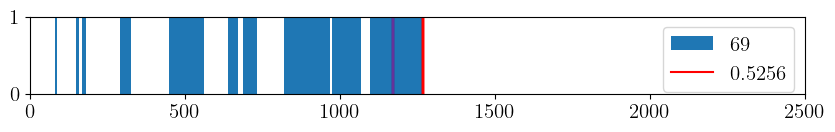

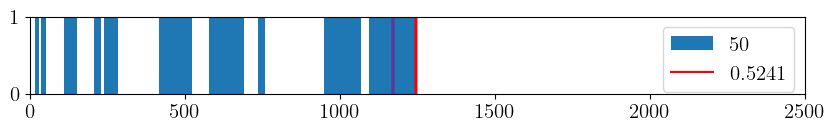

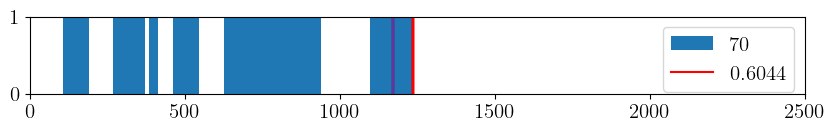

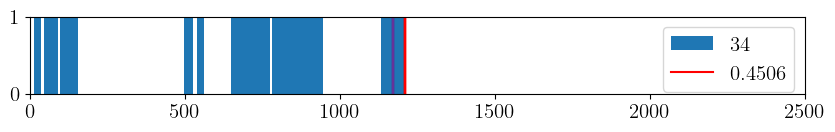

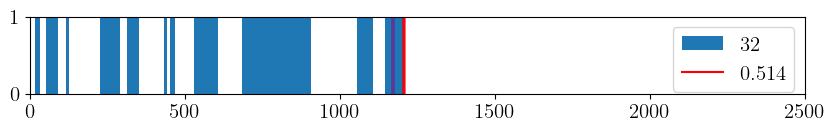

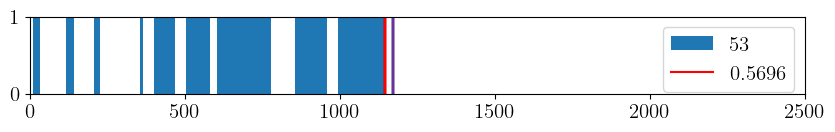

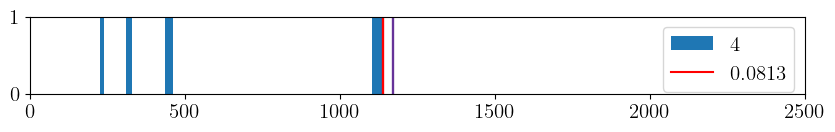

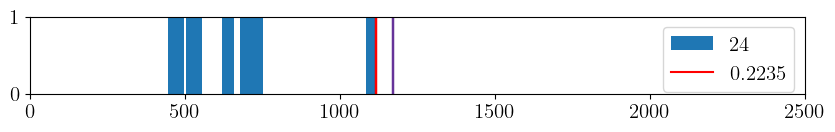

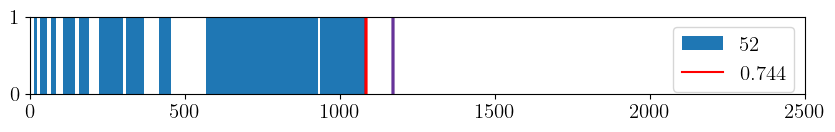

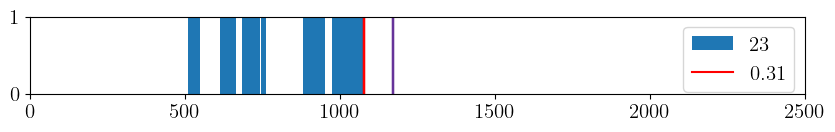

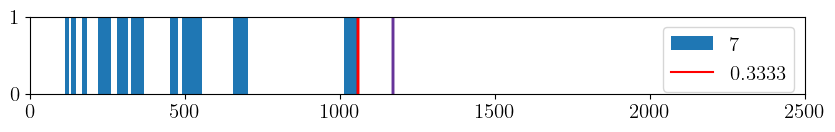

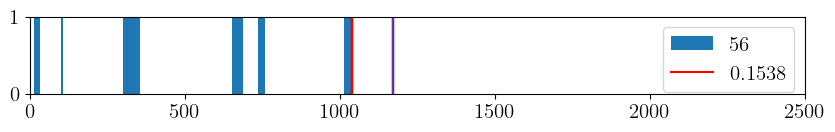

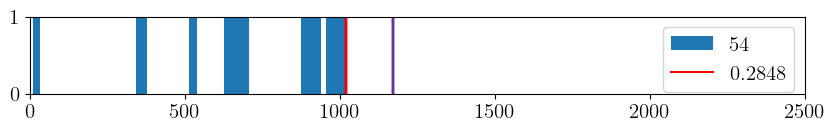

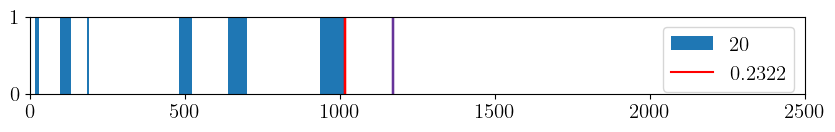

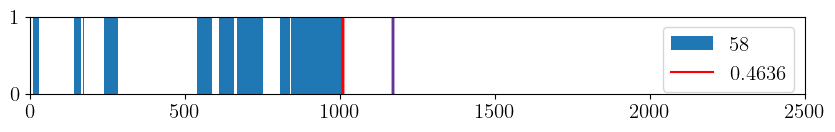

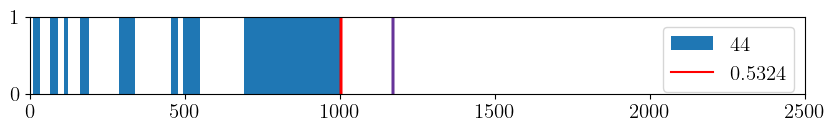

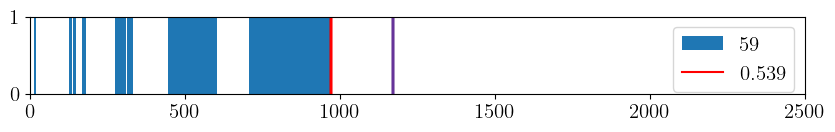

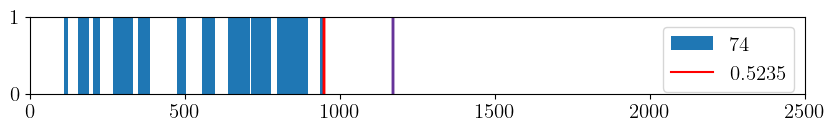

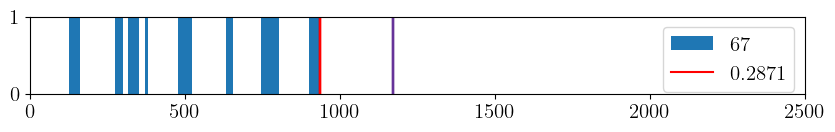

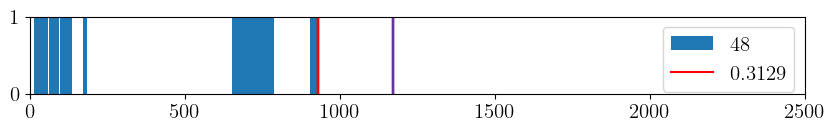

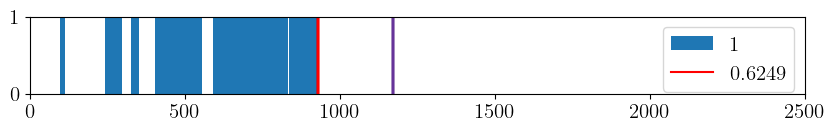

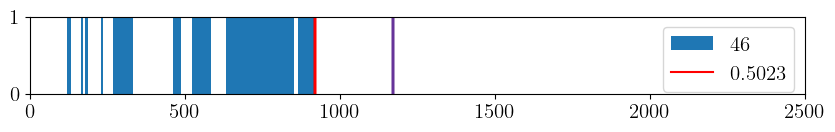

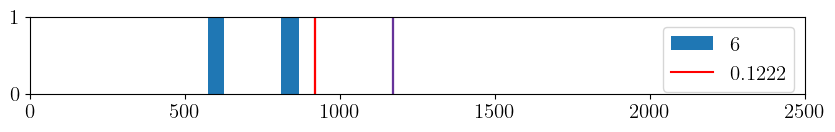

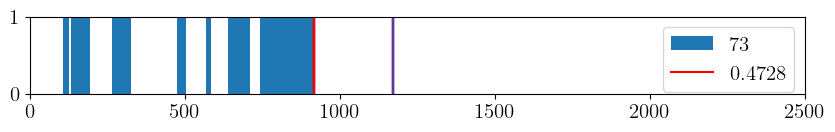

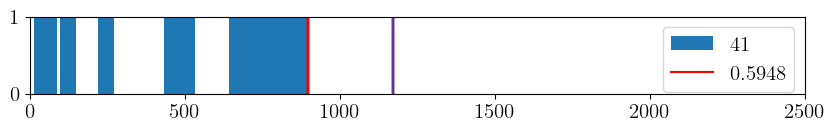

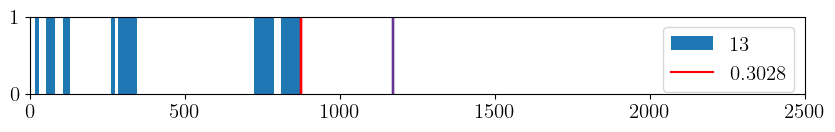

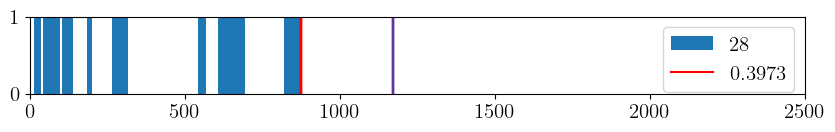

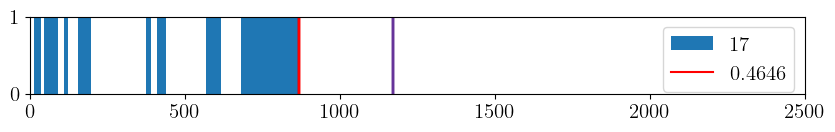

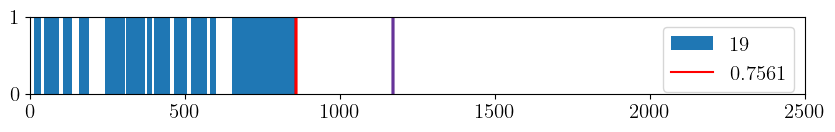

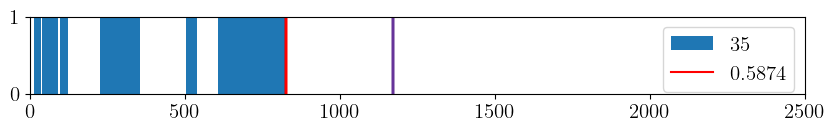

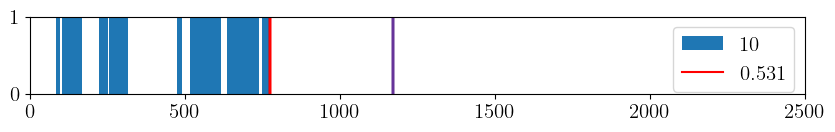

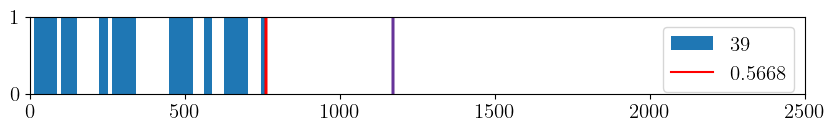

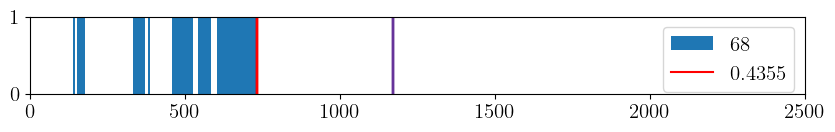

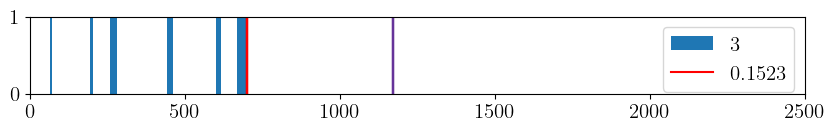

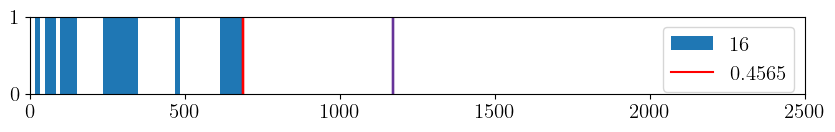

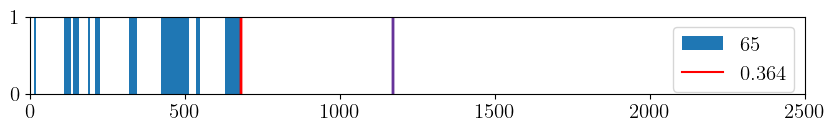

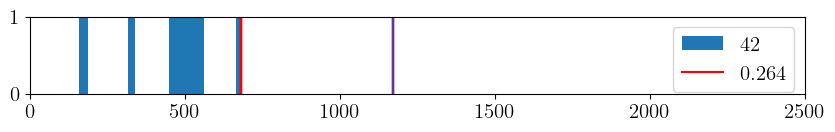

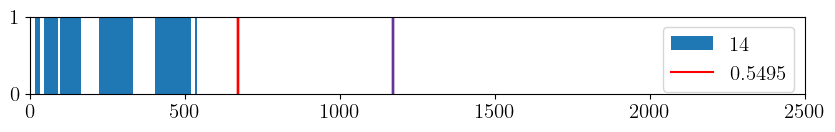

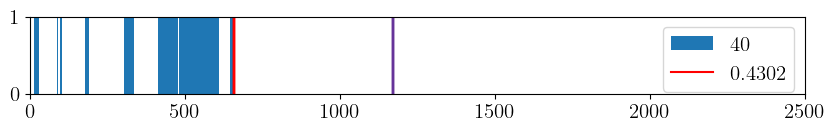

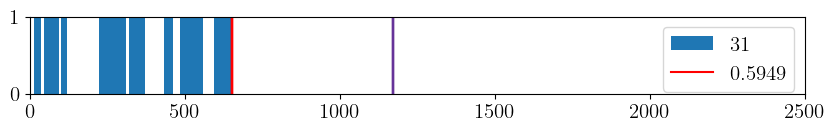

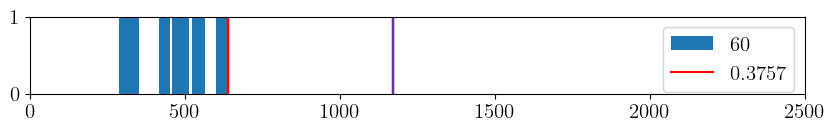

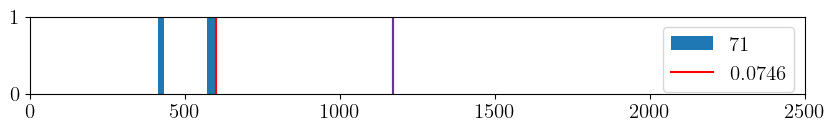

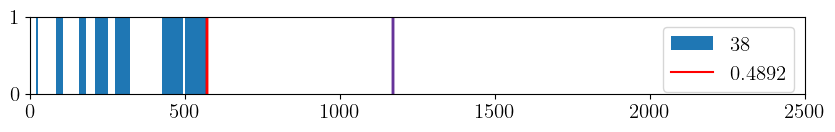

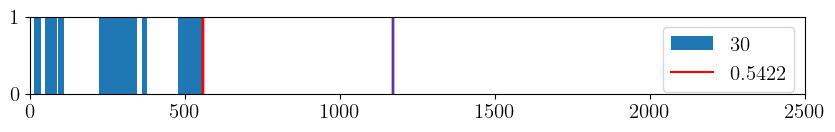

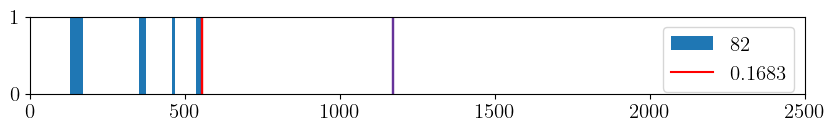

In [114]:
#colors = plt.cm.tab20.colors

for key in intersect_data.keys():
    intervals = intersect_data[key]
    plt.figure(figsize = (10,1))

    for i in range(len(intervals['intervals'])):
        interval = intervals['intervals'][i]
        if (type(interval.lower) == I._PInf):
            continue
        else:
            #color = colors[i % len(colors)]
            #plt.axvspan(float(interval.lower)*fourlac_invoids.iloc[[0]].cmvd_Mpc[0], float(interval.upper)*fourlac_invoids.iloc[[0]].cmvd_Mpc[0], color = color, label = intervals['void_size'][i])
            plt.axvspan(float(interval.lower)*fourlac_invoids.loc[key, 'cmvd_Mpc'], float(interval.upper)*fourlac_invoids.loc[key, 'cmvd_Mpc'])
            plt.axvline(fourlac_invoids.loc[key, 'cmvd_Mpc'], color = 'r')
            plt.axvline(1170, color = 'rebeccapurple')
    plt.xlim(0, 2500)
    #plt.legend()
    plt.legend([key, round(fourlac_invoids.loc[key, 'Voidiness'], 4)])
    plt.show()
    plt.close()

In [115]:
fourlac_invoids = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
output, intersect_data = voidy_analysis(sutter_voids, fourlac_invoids)

In [116]:
#from intervals import IntInterval  # or import your specific interval type if custom

def merge_intervals(intervals):
    # Filter out intervals with infinite bounds
    finite_intervals = [
        x for x in intervals
        if isinstance(x.lower, (int, float)) and isinstance(x.upper, (int, float))
    ]

    # Sort intervals by lower bound
    sorted_intervals = sorted(finite_intervals, key=lambda x: float(x.lower))

    merged = []
    for interval in sorted_intervals:
        if not merged:
            merged.append(interval)
        else:
            last = merged[-1]
            if interval.lower <= last.upper:  # Check overlap
                # Merge by taking the union
                merged[-1] = last | interval
            else:
                merged.append(interval)

    return merged


In [117]:
#voidiness_cut_2 = []
voidi_oidyness2 = []
for key in intersect_data.keys():
    intervals = intersect_data[key]['intervals']
    sorted_intervals = merge_intervals(intervals)

    last_void = sorted_intervals[-1]
    voidi_oidyness = (last_void.upper - last_void.lower) #fraction of line of sight that is in last void

    voidi_oidyness2.append(voidi_oidyness)

    #new_voidiness = (fourlac_invoids.loc[key, 'Void_Dist_Mpc'] - (last_void.upper - last_void.lower)*fourlac_invoids.loc[key, 'cmvd_Mpc'])/fourlac_invoids.loc[key, 'cmvd_Mpc']
    fourlac_invoids.loc[key, 'Voidiness_Cut2'] = (fourlac_invoids.loc[key, 'Void_Dist_Mpc'] - (last_void.upper - last_void.lower)*fourlac_invoids.loc[key, 'cmvd_Mpc'])/fourlac_invoids.loc[key, 'cmvd_Mpc']
    fourlac_invoids.loc[key, 'Voidi-Oidyness2'] = voidi_oidyness


In [118]:
fourlac_invoids[['Voidiness', 'Voidiness_Cut', 'Voidiness_Cut2', 'Voidi-Oidyness','Voidi-Oidyness2']]

,Voidiness,Voidiness_Cut,Voidiness_Cut2,Voidi-Oidyness,Voidi-Oidyness2
0,0.451629,0.402837,0.446752,0.048792,0.004877
1,0.624907,0.578045,0.526870,0.046862,0.098037
2,0.303398,0.241376,0.243124,0.062023,0.060275
3,0.152306,0.092971,0.106164,0.059335,0.046142
4,0.081320,0.001176,0.051079,0.080144,0.030240
...,...,...,...,...,...
79,0.551762,0.495308,0.513108,0.056454,0.038654
80,0.123669,0.069141,0.100881,0.054528,0.022788
81,0.361247,0.334024,0.326087,0.027223,0.035160
82,0.168262,0.094744,0.133916,0.073518,0.034346


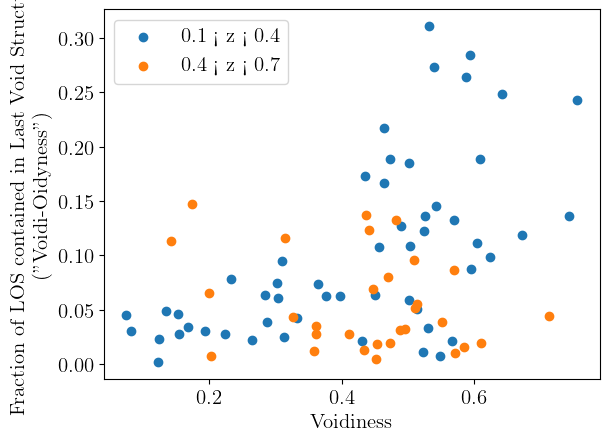

In [153]:
plt.scatter(fourlac_invoids[fourlac_invoids.z < 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z < 0.4]['Voidi-Oidyness2'], label = '0.1 < z < 0.4')

plt.scatter(fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z >= 0.4]['Voidi-Oidyness2'], label = '0.4 < z < 0.7')
plt.xlabel('Voidiness')
plt.ylabel('Fraction of LOS contained in Last Void Structure \n ("Voidi-Oidyness")')

plt.legend()

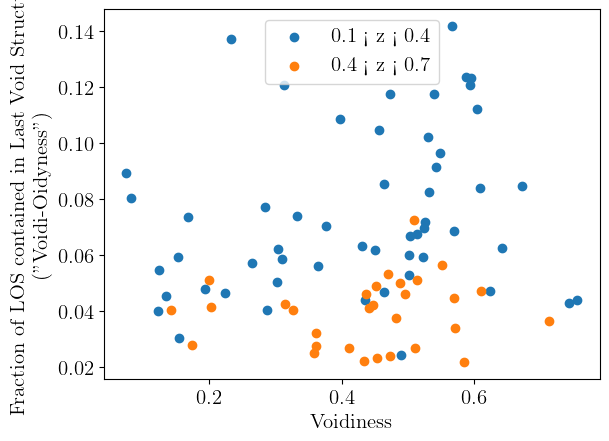

In [154]:
plt.scatter(fourlac_invoids[fourlac_invoids.z < 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z < 0.4]['Voidi-Oidyness'], label = '0.1 < z < 0.4')

plt.scatter(fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z >= 0.4]['Voidi-Oidyness'], label = '0.4 < z < 0.7')
plt.xlabel('Voidiness')
plt.ylabel('Fraction of LOS contained in Last Void Structure \n ("Voidi-Oidyness")')

plt.legend()

In [149]:
fourlac_invoids['Voidi-Oidyness2_Dist'] = fourlac_invoids['Voidi-Oidyness2']*fourlac_invoids['cmvd_Mpc']

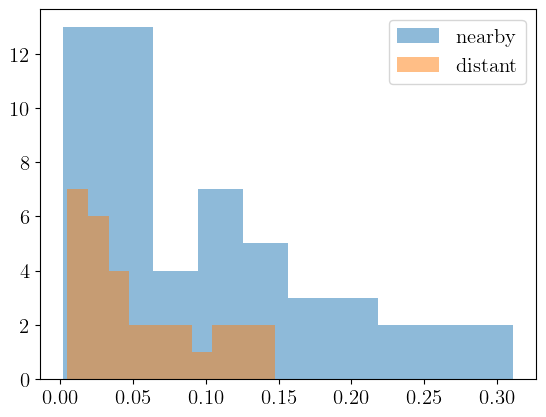

In [148]:
#plt.hist(fourlac_invoids['Voidi-Oidyness2'], alpha = 0.5, label = 'total')

plt.hist(fourlac_invoids[fourlac_invoids.z < 0.4]['Voidi-Oidyness2'], alpha = 0.5, label = 'nearby')
plt.hist(fourlac_invoids[fourlac_invoids.z >= 0.4]['Voidi-Oidyness2'], alpha = 0.5, label = 'distant')

plt.legend()

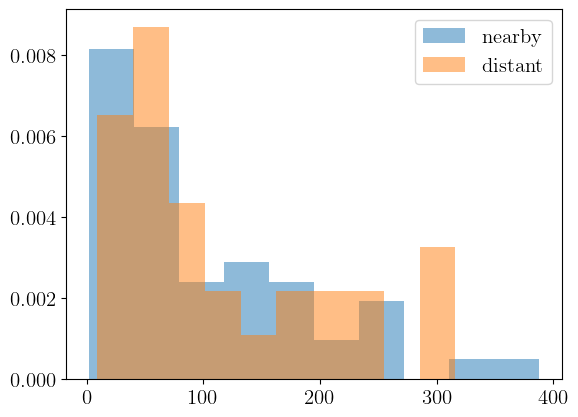

In [151]:

plt.hist(fourlac_invoids[fourlac_invoids.z < 0.4]['Voidi-Oidyness2_Dist'], alpha = 0.5, label = 'nearby', density = True)
plt.hist(fourlac_invoids[fourlac_invoids.z >= 0.4]['Voidi-Oidyness2_Dist'], alpha = 0.5, label = 'distant', density = True)

plt.legend()

In [123]:
fourlac_invoids.to_excel('exported_dataFrames/4lacsutter_invoids.xlsx')

KS: 0.3016

median P-value: 0.00665781667970097

Significance (one-tail): 2.475214077143639 Sigma

2 sigma more voidy

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.special import erfinv
from astropy.io import fits
cmap = plt.get_cmap("tab10")

params = {#'backend': 'ps',
      'axes.labelsize': 15,
      'xtick.labelsize': 15,
      'ytick.labelsize': 15,
      'legend.fontsize': 15}
plt.rcParams.update(params)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [125]:
from matplotlib.patches import Polygon

def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

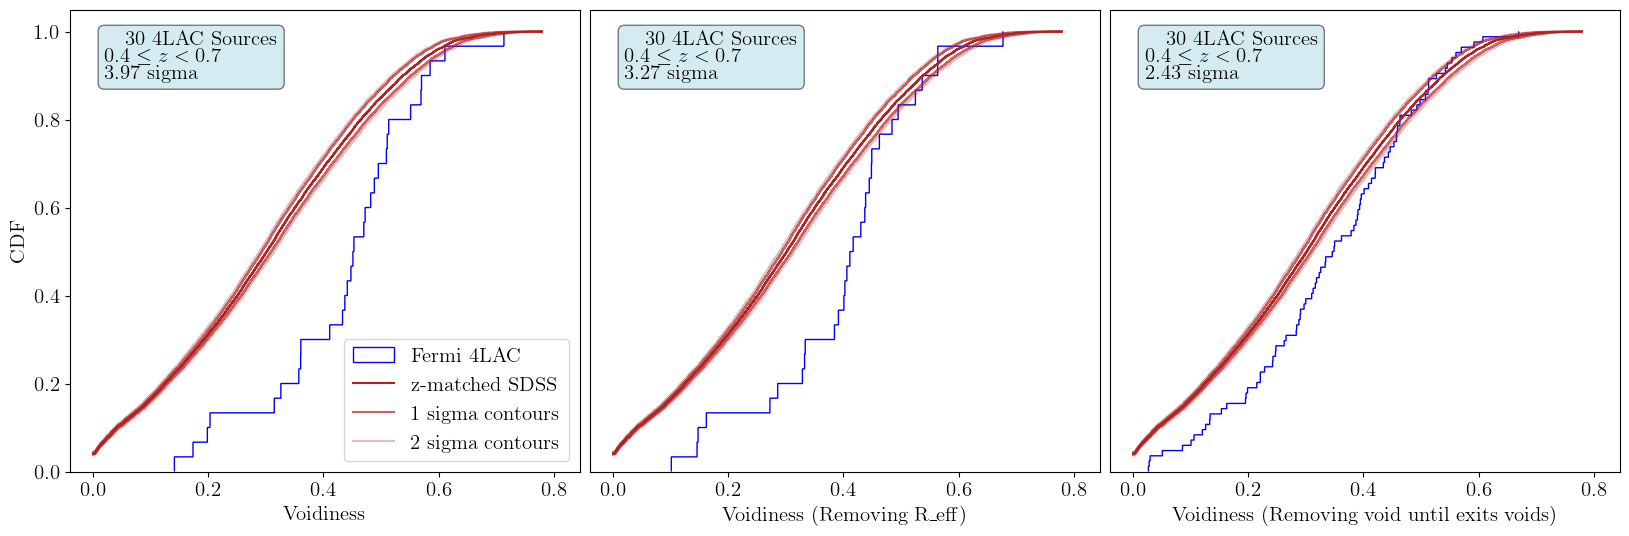

In [126]:
plt.figure(figsize = (20,6))

#LOW REDSHIFT

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_invoids_total.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,1)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick",alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick",alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")

plt.text(0.02, 1, r"30 4LAC Sources \\ $0.4 \leq z < 0.7$ \\ 3.97 sigma",
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.1 \leq z < 0.4$", fontsize = 20)


# HIGH REDSHIFT ------------------------------------------------------------------------

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_invoids_voidinesscut.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness_Cut"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,2)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick",alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness (Removing R_eff)')
plt.yticks([]) 
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right")
plt.text(0.02, 1, r"30 4LAC Sources \\ $0.4 \leq z < 0.7$ \\ 3.27 sigma",
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.4 \leq z < 0.7$", fontsize = 20)


# TOTAL REDSHIFT --------------------------------------------------------------------
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_invoids_voidinesscut2.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness_Cut2"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,3)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3,  ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness (Removing void until exits voids)')
plt.yticks([]) 
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right")
plt.text(0.02, 1, r"30 4LAC Sources \\ $0.4 \leq z < 0.7$ \\ 2.43 sigma",
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.1 \leq z < 0.7$", fontsize = 20)


plt.subplots_adjust(wspace=0.02, hspace=0.02)

#plt.show()

#plt.savefig("sutter_voidMpc.png", dpi = 300, bbox_inches = 'tight')